In [1]:
import numpy as np
from numpy import array, newaxis, expand_dims
import matplotlib.pyplot as plt
import pandas as pd
from copy import deepcopy as copy
import matplotlib.backends.backend_pdf as pdflib
import scipy as sp
import scipy.stats as stats
import math
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler
import math

# plotly.tools.set_credentials_file(username='mhossa10', api_key='CSWpOV3xHUVRzimjfHSB')
from sklearn.svm import SVR



In [2]:
color_list1 = ['#1b9e77', '#d95f02', '#7570b3', '#e7298a', '#66a61e', '#e6ab02']
color_list2 = ['#e41a1c', '#377eb8', '#4daf4a', '#984ea3', '#ff7f00', '#ffff33']
color_list3 = ['#a6cee3', '#1f78b4', '#b2df8a', '#33a02c', '#fb9a99', '#e31a1c']

In [413]:
test_matrices = [
    "delaunay_n20"
    , "NACA0015"
    , "belgium"
    , "AS365"
    , "roadNet-TX"
    , "road_central"
    , "NLR"
    , "hugetrace-00010"
    , "nlpkkt200"
#     , "uk2002"
]

rmat_test_matrices = [
#     "rmat_490M3M"
#     , "rmat_520M2M"
#     , "rmat_610M1M"
#     , "rmat_620M2M"
#     , "rmat_810M2M"
#     , "rmat_200M3M"
#     , "rmat_400M4M"
#     , "rmat_700M3M"
#     , "rmat_700M4M"
#      "rmat_590M2M",  
    "rmat_620M2M", "rmat_680M3M", "rmat_690M2M"
#     , "rmat_780M2M "
   
]

_rmat_test_matrices = [
    "rmat_620M2M-33-33-33", "rmat_680M3M-33-33-33", "rmat_690M2M-33-33-33"
]

random_rmat_test_matrices = [
    "rmat_620M2M-33-33-33_random", "rmat_680M3M-33-33-33_random", "rmat_690M2M-33-33-33_random"
]

rmat_random_to_org_map = {
    "rmat_620M2M-33-33-33_random" : "rmat_620M2M", 
    "rmat_680M3M-33-33-33_random" : "rmat_680M3M", 
    "rmat_690M2M-33-33-33_random" : "rmat_690M2M",
    "rmat_620M2M-33-33-33" : "rmat_620M2M", 
    "rmat_680M3M-33-33-33" : "rmat_680M3M", 
    "rmat_690M2M-33-33-33" : "rmat_690M2M"
}

In [369]:
rmat_csr_2d[rmat_csr_2d["Name"] == "rmat_780M2M"]

,Name,Nodes,nProcess,DataType,MatrixSize,AvgRow,NNZ,NonZeroPerRow,AvgNPRSD,AvgTime,AvgBcastTime,AvgMatmulTime,AvgReduceTime,TotalRun,Density
78,rmat_780M2M,8,256,4,1999463,124967,6093749,48.7629,123.850,17.23425,0.530607,12.62575,4.07791,20,0.00039
110,rmat_780M2M,5,169,4,1999463,153805,9230768,60.0161,152.462,32.75280,0.622270,25.29980,6.83067,20,0.00039
127,rmat_780M2M,4,144,4,1999463,166622,10833332,65.0174,165.145,42.04770,0.911113,33.98860,7.14792,20,0.00039


# Get Optimal Info

In [370]:
def get_optimal(_test_matrices, _csr_kway_pred, _coo_kway_pred, _csr_local_kway_pred, _coo_local_kway_pred, _csr_2d_pred, _coo_2d_pred):
    _mat = []
    _p = []
    _algo = []
    _ralgo = []
    _csr_g1dr = []
    _coo_g1dr = []
    _csr_l1dr = []
    _coo_l1dr = []
    _csr_2d = []
    _coo_2d = []
    _pr_csr_g1dr = []
    _pr_coo_g1dr = []
    _pr_csr_l1dr = []
    _pr_coo_l1dr = []
    _pr_csr_2d = []
    _pr_coo_2d = []
    _right = []
    _ac = []
    _pr = []
    _optimal = pd.DataFrame()
    for m in _test_matrices:
        for p in [225]:
            _p.append(p)
            _mat.append(m)
            al1 = _csr_kway_pred[(_csr_kway_pred["Name"] == m) & (_csr_kway_pred["Process"] == p)].iloc[0]
            csr_gk = al1["Predicted Time"]
            min_t = csr_gk;
            min_a = "CSR G1DR SpMV"
            r_a = "CSR G1DR SpMV"
            r_t = al1["Actual Time"]
            _csr_g1dr.append(al1["Actual Time"])
            _pr_csr_g1dr.append(al1["Predicted Time"])
            al5 = _csr_2d_pred[(_csr_2d_pred["Name"] == m) & (_csr_2d_pred["Process"] == p)].iloc[0]
            csr_2d = al5["Predicted Time"]
            _csr_2d.append(al5["Actual Time"])
            _pr_csr_2d.append(al5["Predicted Time"])
            if min_t > csr_2d:
                min_t = csr_2d
                min_a = "CSR 2DU"
            if r_t > al5["Actual Time"]:
                r_t = al5["Actual Time"]
                r_a = "CSR 2DU"
            al2 = _coo_kway_pred[(_coo_kway_pred["Name"] == m) & (_coo_kway_pred["Process"] == p)].iloc[0]
            coo_gk = al2["Predicted Time"]
            _coo_g1dr.append(al2["Actual Time"])
            _pr_coo_g1dr.append(al2["Predicted Time"])
            if min_t > coo_gk:
                min_t = coo_gk
                min_a = "COO G1DR SpMV"
            if r_t > al2["Actual Time"]:
                r_t = al2["Actual Time"]
                r_a = "COO G1DR SpMV"
            al6 = _coo_2d_pred[(_coo_2d_pred["Name"] == m) & (_coo_2d_pred["Process"] == p)].iloc[0]
            coo_2d = al6["Predicted Time"]
            _coo_2d.append(al6["Actual Time"])
            _pr_coo_2d.append(al6["Predicted Time"])
            if min_t > coo_2d:
                min_t = coo_2d
                min_a = "COO 2DU"
            if r_t > al6["Actual Time"]:
                r_t = al6["Actual Time"]
                r_a = "COO 2DU"
            al3 = _csr_local_kway_pred[(_csr_local_kway_pred["Name"] == m) & (_csr_local_kway_pred["Process"] == p)].iloc[0]
            csr_lk = al3["Predicted Time"]
            _csr_l1dr.append(al3["Actual Time"])
            _pr_csr_l1dr.append(al3["Predicted Time"])
            if min_t > csr_lk:
                min_t = csr_lk
                min_a = "CSR L1DR SpMV"
            if r_t > al3["Actual Time"]:
                r_t = al3["Actual Time"]
                r_a = "CSR L1DR SpMV"
            al4 = _coo_local_kway_pred[(_coo_local_kway_pred["Name"] == m) & (_coo_local_kway_pred["Process"] == p)].iloc[0]
            coo_lk = al4["Predicted Time"]
            _coo_l1dr.append(al4["Actual Time"])
            _pr_coo_l1dr.append(al4["Predicted Time"])
            if min_t > coo_lk:
                min_t = coo_lk
                min_a = "COO L1DR SpMV"
            if r_t > al4["Actual Time"]:
                r_t = al4["Actual Time"]
                r_a = "COO L1DR SpMV"
            _algo.append(min_a)
            _ralgo.append(r_a)
            _ac.append(r_t)
            _pr.append(min_t)
            if min_a == r_a:
                _right.append(1)
            else:
                _right.append(0)
    #         print(p, " algo: ", min_a, " time:", min_t, " csr lk:", csr_lk, " csr gk:", csr_gk, " csr 2d:", csr_2d, " coo lk:", coo_lk, " coo gk:", coo_gk, " coo 2d:", coo_2d)
    _optimal["Matrices"] = _mat
    _optimal["Processes"] = _p
    _optimal["Predicted Best Strategy"] = _algo
    _optimal["Actual Best Strategy"] = _ralgo
    _optimal["R/W"] = _right
    _optimal["CSR L1DR SpMV"] = _csr_l1dr
    _optimal["CSR L1DR SpMV Predicted"] = _pr_csr_l1dr
    _optimal["COO L1DR SpMV"] = _coo_l1dr
    _optimal["COO L1DR SpMV Predicted"] = _pr_coo_l1dr
    _optimal["CSR G1DR SpMV"] = _csr_g1dr
    _optimal["CSR G1DR SpMV Predicted"] = _pr_csr_g1dr
    _optimal["COO G1DR SpMV"] = _coo_g1dr
    _optimal["COO G1DR SpMV Predicted"] = _pr_coo_g1dr
    _optimal["CSR 2DU"] = _csr_2d
    _optimal["CSR 2DU Predicted"] = _pr_csr_2d
    _optimal["COO 2DU"] = _coo_2d
    _optimal["COO 2DU Predicted"] = _pr_coo_2d
    _optimal["Predicted Time"] = _ac
    _optimal["Actual Time"] = _pr
    _optimal[_optimal["Processes"] == 225]
    return _optimal

# SVR Model 1(AvgRows, AvgNNZ, AvgNPR, AvgNPRSD, Density)

In [371]:
def spmv_svr_model_1(data, testMat, process, model_name="CSR GK-SPMV", col1="AvgRows", col2="AvgNNZ", col3="AvgNPR", col4="AvgNPRSD"):
    csr_kway_pred = pd.DataFrame()
    mat = [] 
    node = []
    prcs = []
    rows = []
    m_size = []
    nnz_r = []
    a_time = []
    p_time = []
    err = []
    spmv_model = []
    for p in process:
        csr_kway_spmv = data[data["nProcess"] == p].reset_index()
        csr_kway_spmv = csr_kway_spmv.groupby(["Name", "nProcess"]).mean().reset_index().sort_values(by="Name").reset_index(drop=True)
        csr_kway_spmv.dropna(
            axis=0,
            how='any',
            thresh=None,
            subset=None,
            inplace=True
        )

        csr_kway_spmv = csr_kway_spmv.sort_values(by=[col1, col2]).reset_index(drop=True)
        density = []
        for i,r in csr_kway_spmv.iterrows():
            density.append(float(r[col2])/float(r[col1] * r[col1]))
        csr_kway_spmv["Density"] = density
        column = "AvgTime"
        csr_kway_train_data = csr_kway_spmv[~csr_kway_spmv["Name"].isin(testMat)].reset_index(drop=True)
        csr_kway_test_data = csr_kway_spmv[csr_kway_spmv["Name"].isin(testMat)].reset_index(drop=True)
        csr_kway_train = csr_kway_train_data[[col1, col2, col3, col4, "Density"]].to_numpy()

        csr_kway_test = csr_kway_test_data[[col1, col2, col3, col4, "Density"]].to_numpy()

        csr_kway_X = np.concatenate((csr_kway_train, csr_kway_test), axis=0)
        scaler = MinMaxScaler()  # Default behavior is to scale to [0,1]
        csr_kway_X = scaler.fit_transform(csr_kway_X)
        X = csr_kway_X[0:len(csr_kway_train)]
        csr_kway_test_X = csr_kway_X[len(csr_kway_train):]
        train_y = np.array(csr_kway_train_data[column])
        test_y = np.array(csr_kway_test_data[column])

        scores = []
        best = 0
        # c=20e4
        # e=0.001
        for c in np.linspace(2e1,6e4, num=10):
            for e in np.linspace(0.0001, 0.1, 20):
                best_svr = SVR(kernel='poly', C=c, gamma='auto', degree=3, epsilon=e, coef0=1)
                cv = KFold(n_splits=5, random_state=42, shuffle=True)
                for train_index, test_index in cv.split(X):
                    X_train, X_test, y_train, y_test = X[train_index], X[test_index], train_y[train_index], train_y[test_index]
                    best_svr.fit(X_train, y_train)
                    scores.append(best_svr.score(X_test, np.array(y_test)))
                    if best < np.mean(scores):
                        best = np.mean(scores)
                        best_param = {"C": c, "epsilon": e}
        svr = SVR(kernel='poly', C=best_param['C'], gamma='auto', degree=3, epsilon=best_param['epsilon'], coef0=1)
        svr.fit(X, train_y)
        y_pred = svr.predict(csr_kway_test_X)

        max_err = 0
        avg_err = 0
        for i,row in csr_kway_test_data.iterrows():
        #     print(y[index])
        #     g = row["Name"].split("_")
            print(row["Name"], " & ", '{0:.5g}'.format(test_y[i])," & ",'{0:.5g}'.format(y_pred[i]), " & ", 
                  '{0:.4g}'.format(abs(test_y[i]-y_pred[i])*100/test_y[i])+"\\%", "\\\ \hline")    
            if max_err < abs(test_y[i]-y_pred[i])*100/test_y[i]:
                max_err = abs(test_y[i]-y_pred[i])*100/test_y[i]
            avg_err += abs(test_y[i]-y_pred[i])*100/test_y[i]
            mat.append(row["Name"])
            node.append(row["Nodes"])
            prcs.append(row["nProcess"])
            rows.append(row[col1])
            nnz_r.append(row[col3])
            a_time.append(float('{0:.5g}'.format(test_y[i])))
            p_time.append(float('{0:.5g}'.format(y_pred[i])))
            err.append(float('{0:.4g}'.format(abs(test_y[i]-y_pred[i])*100/test_y[i])))
            spmv_model.append(model_name)
            m_size.append(row["MatrixSize"])
        # omp_data.groupby("Threads").count()
        print("best param: ", best_param)
        print("max error: ", max_err, " avg error: ", avg_err/csr_kway_test_data.shape[0])
    csr_kway_pred["Name"] = mat
    csr_kway_pred["Model"] = spmv_model
    csr_kway_pred["Nodes"] = node
    csr_kway_pred["Process"] = prcs
    csr_kway_pred["Matrix Size"] = m_size
    csr_kway_pred["Avg Row"] = rows
    csr_kway_pred["Nonzero per Row"] = nnz_r
    csr_kway_pred["Actual Time"] = a_time
    csr_kway_pred["Predicted Time"] = p_time
    csr_kway_pred["Error"] = err
    return csr_kway_pred

# SVR Model 2(AvgRows, AvgNNZ, AvgNPR, AvgNPRSD, Density, AvgLocalNNZ, AvgGlobalNNZ, AvgInterProcessCall, AvgDataSend)

In [372]:
def spmv_svr_model_2(data, testMat, process, model_name="CSR LK-SPMV"):
    csr_local_kway_pred = pd.DataFrame()
    mat = [] 
    node = []
    prcs = []
    rows = []
    nnz_r = []
    a_time = []
    p_time = []
    err = []
    spmv_model = []
    m_size = []
    for p in process:
        csr_local_kway_spmv = data[data["nProcess"] == p].reset_index()
        csr_local_kway_spmv = csr_local_kway_spmv.groupby(["Name", "nProcess"]).mean().reset_index().sort_values(by="Name").reset_index(drop=True)
        csr_local_kway_spmv.dropna(
            axis=0,
            how='any',
            thresh=None,
            subset=None,
            inplace=True
        )
        csr_local_kway_spmv = csr_local_kway_spmv.sort_values(by=["AvgRows", "AvgNPR"]).reset_index(drop=True)

        density = []
        for i,r in csr_local_kway_spmv.iterrows():
            density.append(float(r["AvgNNZ"])/float(r["AvgRows"] * r["AvgRows"]))
        csr_local_kway_spmv["Density"] = density

        column = "AvgTime"
        csr_local_kway_train_data = csr_local_kway_spmv[~csr_local_kway_spmv["Name"].isin(testMat)].reset_index(drop=True)
        csr_local_kway_test_data = csr_local_kway_spmv[csr_local_kway_spmv["Name"].isin(testMat)].reset_index(drop=True)

    #     csr_local_kway_train = csr_local_kway_train_data[["AvgRows", "AvgNNZ", "AvgNPR", "AvgNPRSD", "Density"]].to_numpy()
    #     csr_local_kway_test = csr_local_kway_test_data[["AvgRows", "AvgNNZ", "AvgNPR", "AvgNPRSD", "Density"]].to_numpy()

        csr_local_kway_train = csr_local_kway_train_data[["AvgRows", "AvgNNZ", "AvgNPR", "AvgLocalNNZ", "AvgGlobalNNZ", "AvgInterProcessCall", "AvgDataSend", "AvgNPRSD", "Density"]].to_numpy()
        csr_local_kway_test = csr_local_kway_test_data[["AvgRows", "AvgNNZ", "AvgNPR", "AvgLocalNNZ", "AvgGlobalNNZ", "AvgInterProcessCall", "AvgDataSend", "AvgNPRSD", "Density"]].to_numpy()

        csr_local_kway_X = np.concatenate((csr_local_kway_train, csr_local_kway_test), axis=0)
        scaler = MinMaxScaler()  # Default behavior is to scale to [0,1]
        csr_local_kway_X = scaler.fit_transform(csr_local_kway_X)
        X = csr_local_kway_X[0:len(csr_local_kway_train)]
        csr_local_kway_test_X = csr_local_kway_X[len(csr_local_kway_train):]
        train_y = np.array(csr_local_kway_train_data[column])
        test_y = np.array(csr_local_kway_test_data[column])

        scores = []
        best = 0
        # c=20e4
        # e=0.001
        for c in np.linspace(2e1,6e4, num=50):
            for e in np.linspace(0.0001, 0.9, 20):
                best_svr = SVR(kernel='poly', C=c, gamma='auto', degree=3, epsilon=e, coef0=1)
                cv = KFold(n_splits=5, random_state=42, shuffle=True)
                for train_index, test_index in cv.split(X):
                    X_train, X_test, y_train, y_test = X[train_index], X[test_index], train_y[train_index], train_y[test_index]
                    best_svr.fit(X_train, y_train)
                    scores.append(best_svr.score(X_test, np.array(y_test)))
                    if best < np.mean(scores):
                        best = np.mean(scores)
                        best_param = {"C": c, "epsilon": e}
        svr = SVR(kernel='poly', C=best_param['C'], gamma='auto', degree=3, epsilon=best_param['epsilon'], coef0=1)
        svr.fit(X, train_y)
        y_pred = svr.predict(csr_local_kway_test_X)

        max_err = 0
        avg_err = 0
        for i,row in csr_local_kway_test_data.iterrows():
        #     print(y[index])
        #     g = row["Name"].split("_")
            print(row["Name"], " & ", '{0:.5g}'.format(test_y[i])," & ",'{0:.5g}'.format(y_pred[i]), " & ", 
                  '{0:.4g}'.format(abs(test_y[i]-y_pred[i])*100/test_y[i])+"\\%", "\\\ \hline")           
            if max_err < abs(test_y[i]-y_pred[i])*100/test_y[i]:
                max_err = abs(test_y[i]-y_pred[i])*100/test_y[i]
            avg_err += abs(test_y[i]-y_pred[i])*100/test_y[i]
            mat.append(row["Name"])
            node.append(row["Nodes"])
            prcs.append(row["nProcess"])
            rows.append(row["AvgRows"])
            nnz_r.append(row["AvgNPR"])
            a_time.append(float('{0:.5g}'.format(test_y[i])))
            p_time.append(float('{0:.5g}'.format(y_pred[i])))
            err.append(float('{0:.4g}'.format(abs(test_y[i]-y_pred[i])*100/test_y[i])))
            spmv_model.append(model_name)
            m_size.append(row["MatrixSize"])
        # omp_data.groupby("Threads").count()
        print("best param: ", best_param)
        print("max error: ", max_err, " avg error: ", avg_err/csr_local_kway_test_data.shape[0])
    csr_local_kway_pred["Name"] = mat
    csr_local_kway_pred["Model"] = spmv_model
    csr_local_kway_pred["Nodes"] = node
    csr_local_kway_pred["Process"] = prcs
    csr_local_kway_pred["Matrix Size"] = m_size
    csr_local_kway_pred["Avg Row"] = rows
    csr_local_kway_pred["Nonzero per Row"] = nnz_r
    csr_local_kway_pred["Actual Time"] = a_time
    csr_local_kway_pred["Predicted Time"] = p_time
    csr_local_kway_pred["Error"] = err
    return csr_local_kway_pred

In [373]:
def dynamic_svr_model(data, attributes, df_column, model_name, target = "AvgTime"):
    _df_pred = pd.DataFrame()
    mat = [] 
    node = []
    prcs = []
    rows = []
    _nnz = []
    a_time = []
    p_time = []
    err = []
    spmv_model = []
    m_size = []

    density = []
    min_time_factor = 1.0
    if min(data[target]) < 1.0:
        min_time_factor = 1/min(data[target])
    for i,r in data.iterrows():
        data.at[i, target] = min_time_factor*r[target]
        density.append(float(r[df_column[4]])/float(r[df_column[3]] * r[df_column[3]]))
    data["Density"] = density


    _train_data = data[~data[df_column[0]].isin(rmat_test_matrices)].reset_index(drop=True)
    _test_data = data[data[df_column[0]].isin(rmat_test_matrices)].reset_index(drop=True)

    _dyn_spmv_train = _train_data[attributes].to_numpy()
    _dyn_spmv_test = _test_data[attributes].to_numpy()

    _spmv_X = np.concatenate((_dyn_spmv_train, _dyn_spmv_test), axis=0)
    scaler = MinMaxScaler()  # Default behavior is to scale to [0,1]
    _spmv_X = scaler.fit_transform(_spmv_X)
    X = _spmv_X[0:len(_dyn_spmv_train)]
    _test_X = _spmv_X[len(_dyn_spmv_train):]
    train_y = np.array(_train_data[target])
    test_y = np.array(_test_data[target])

    scores = []
    best = 0
    best_param = {}
    # c=20e4
    # e=0.001
    for c in np.linspace(2e1,6e4, num=50):
        for e in np.linspace(0.0001, 0.9, 20):
            best_svr = SVR(kernel='poly', C=c, gamma='auto', degree=3, epsilon=e, coef0=1)
            cv = KFold(n_splits=5, random_state=42, shuffle=True)
            for train_index, test_index in cv.split(X):
                X_train, X_test, y_train, y_test = X[train_index], X[test_index], train_y[train_index], train_y[test_index]
                best_svr.fit(X_train, y_train)
                scores.append(best_svr.score(X_test, np.array(y_test)))
                if best < np.mean(scores):
                    best = np.mean(scores)
                    best_param = {"C": c, "epsilon": e}
#     lk_csr_best_param = {'C': 60000.0, 'epsilon': 0.9}
    svr = SVR(kernel='poly', C=best_param['C'], gamma='auto', degree=3, epsilon=best_param['epsilon'], coef0=1)
    svr.fit(X, train_y)
    y_pred = svr.predict(_test_X)

    for i,row in _test_data.iterrows():
        print(row["Name"], " & ", r[df_column[1]], " & ", r[df_column[2]], " & ", '{0:.3f}'.format(test_y[i]/min_time_factor),"&",'{0:.3f}'.format(y_pred[i]/min_time_factor), "&", 
              '{0:.1f}'.format(abs(test_y[i]-y_pred[i])*100/test_y[i])+"\\%", "\\\ \hline")           
        
        mat.append(row[df_column[0]])
        node.append(row[df_column[1]])
        prcs.append(row[df_column[2]])
        rows.append(row[df_column[3]])
        _nnz.append(row[df_column[4]])
        a_time.append(test_y[i]/min_time_factor)
        p_time.append(y_pred[i]/min_time_factor)
        err.append(abs(test_y[i]-y_pred[i])*100/test_y[i])
        spmv_model.append(model_name)
#         m_size.append(row["MatrixSize"])

    _df_pred["Name"] = mat
    _df_pred["Model"] = spmv_model
    _df_pred["Nodes"] = node
    _df_pred["Process"] = prcs
#     csr_dyn_lk_spmv_pred["Matrix Size"] = m_size
    _df_pred["AvgRow"] = rows
    _df_pred["AvgNNZ"] = _nnz
    _df_pred["ActualTime"] = a_time
    _df_pred["PredictedTime"] = p_time
    _df_pred["Error"] = err
    
    print("best param: ", best_param)
    print("max error: ", _df_pred["Error"].max(), " avg error: ", _df_pred["Error"].mean())
    return _df_pred

def dynamic_svr_model_with_best_param(data, attributes, df_column, model_name, best_param, target = "AvgTime"):
    _df_pred = pd.DataFrame()
    mat = [] 
    node = []
    prcs = []
    rows = []
    _nnz = []
    a_time = []
    p_time = []
    err = []
    spmv_model = []
    m_size = []

    density = []
    min_time_factor = 1.0
    if min(data[target]) < 1.0:
        min_time_factor = 1/min(data[target])
    for i,r in data.iterrows():
        data.at[i, target] = min_time_factor*r[target]
        density.append(float(r[df_column[4]])/float(r[df_column[3]] * r[df_column[3]]))
    data["Density"] = density


    _train_data = data[~data[df_column[0]].isin(rmat_test_matrices)].reset_index(drop=True)
    _test_data = data[data[df_column[0]].isin(rmat_test_matrices)].reset_index(drop=True)

    _dyn_spmv_train = _train_data[attributes].to_numpy()
    _dyn_spmv_test = _test_data[attributes].to_numpy()

    _spmv_X = np.concatenate((_dyn_spmv_train, _dyn_spmv_test), axis=0)
    scaler = MinMaxScaler()  # Default behavior is to scale to [0,1]
    _spmv_X = scaler.fit_transform(_spmv_X)
    X = _spmv_X[0:len(_dyn_spmv_train)]
    _test_X = _spmv_X[len(_dyn_spmv_train):]
    train_y = np.array(_train_data[target])
    test_y = np.array(_test_data[target])

    
    svr = SVR(kernel='poly', C=best_param['C'], gamma='auto', degree=3, epsilon=best_param['epsilon'], coef0=1)
    svr.fit(X, train_y)
    y_pred = svr.predict(_test_X)

    for i,row in _test_data.iterrows():
        print(row["Name"], " & ", row[df_column[1]], " & ", row[df_column[2]], " & ", '{0:.3f}'.format(test_y[i]/min_time_factor),"&",'{0:.3f}'.format(y_pred[i]/min_time_factor), "&", 
              '{0:.1f}'.format(abs(test_y[i]-y_pred[i])*100/test_y[i])+"\\%", "\\\ \hline")           
        
        mat.append(row[df_column[0]])
        node.append(row[df_column[1]])
        prcs.append(row[df_column[2]])
        rows.append(row[df_column[3]])
        _nnz.append(row[df_column[4]])
        a_time.append(test_y[i]/min_time_factor)
        p_time.append(y_pred[i]/min_time_factor)
        err.append(abs(test_y[i]-y_pred[i])*100/test_y[i])
        spmv_model.append(model_name)
#         m_size.append(row["MatrixSize"])

    _df_pred["Name"] = mat
    _df_pred["Model"] = spmv_model
    _df_pred["Nodes"] = node
    _df_pred["Process"] = prcs
#     csr_dyn_lk_spmv_pred["Matrix Size"] = m_size
    _df_pred["AvgRow"] = rows
    _df_pred["AvgNNZ"] = _nnz
    _df_pred["ActualTime"] = a_time
    _df_pred["PredictedTime"] = p_time
    _df_pred["Error"] = err
    
    print("best param: ", best_param)
    print("max error: ", _df_pred["Error"].max(), " avg error: ", _df_pred["Error"].mean())
    return _df_pred

# RMAT Data

In [374]:
csr_2d = pd.read_csv("../../SpMV_Model/src/SkylakeResults/MPI_CSR_2D_SpMV.csv")
rmat_csr_2d = csr_2d[csr_2d['Name'].str.contains("rmat")].reset_index(drop=True)
rmat_csr_2d = rmat_csr_2d.groupby(["Name", "nProcess"]).mean().reset_index().sort_values(by="Name").reset_index(drop=True)

coo_2d = pd.read_csv("../../SpMV_Model/src/SkylakeResults/MPI_COO_2D_SpMV.csv")
rmat_coo_2d = coo_2d[coo_2d['Name'].str.contains("rmat")].reset_index(drop=True)
rmat_coo_2d = rmat_coo_2d.groupby(["Name", "nProcess"]).mean().reset_index().sort_values(by="Name").reset_index(drop=True)

local_csr_kway = pd.read_csv("../../SpMV_Model/src/SkylakeResults/MPI_Local_KWAY_CSR_SpMV_Comm.csv")
rmat_local_csr_kway = local_csr_kway[local_csr_kway['Name'].str.contains("rmat")].reset_index(drop=True)
rmat_local_csr_kway = rmat_local_csr_kway.groupby(["Name", "nProcess"]).mean().reset_index().sort_values(by="Name").reset_index(drop=True)

local_coo_kway = pd.read_csv("../../SpMV_Model/src/SkylakeResults/MPI_Local_KWAY_COO_SpMV_Comm.csv")
rmat_local_coo_kway = local_coo_kway[local_coo_kway['Name'].str.contains("rmat")].reset_index(drop=True)
rmat_local_coo_kway = rmat_local_coo_kway.groupby(["Name", "nProcess"]).mean().reset_index().sort_values(by="Name").reset_index(drop=True)

global_csr_kway = pd.read_csv("../../SpMV_Model/src/SkylakeResults/MPI_KWAY_SpMV.csv")
rmat_global_csr_kway = global_csr_kway[global_csr_kway['Name'].str.contains("rmat")].reset_index(drop=True)
rmat_global_csr_kway = rmat_global_csr_kway.groupby(["Name", "nProcess"]).mean().reset_index().sort_values(by="Name").reset_index(drop=True)

global_coo_kway = pd.read_csv("../../SpMV_Model/src/SkylakeResults/MPI_KWAY_COO_SpMV.csv")
rmat_global_coo_kway = global_coo_kway[global_coo_kway['Name'].str.contains("rmat")].reset_index(drop=True)
rmat_global_coo_kway = rmat_global_coo_kway.groupby(["Name", "nProcess"]).mean().reset_index().sort_values(by="Name").reset_index(drop=True)

for i,r in rmat_csr_2d.iterrows():
    rmat_csr_2d.at[i, "Name"] = r["Name"].split('-')[0]
for i,r in rmat_coo_2d.iterrows():
    rmat_coo_2d.at[i, "Name"] = r["Name"].split('-')[0]
    
for i,r in rmat_local_csr_kway.iterrows():
    rmat_local_csr_kway.at[i, "Name"] = r["Name"].split('-')[0]
for i,r in rmat_local_coo_kway.iterrows():
    rmat_local_coo_kway.at[i, "Name"] = r["Name"].split('-')[0]
    
for i,r in rmat_global_csr_kway.iterrows():
    rmat_global_csr_kway.at[i, "Name"] = r["Name"].split('-')[0]
for i,r in rmat_global_coo_kway.iterrows():
    rmat_global_coo_kway.at[i, "Name"] = r["Name"].split('-')[0]
    
rmat_csr_2d_test_data = rmat_csr_2d[rmat_csr_2d["Name"].isin(rmat_test_matrices)].reset_index(drop=True)
rmat_coo_2d_test_data = rmat_coo_2d[rmat_coo_2d["Name"].isin(rmat_test_matrices)].reset_index(drop=True)

rmat_local_csr_kway_test_data = rmat_local_csr_kway[rmat_local_csr_kway["Name"].isin(rmat_test_matrices)].reset_index(drop=True)
rmat_local_coo_kway_test_data = rmat_local_coo_kway[rmat_local_coo_kway["Name"].isin(rmat_test_matrices)].reset_index(drop=True)

rmat_global_csr_kway_test_data = rmat_global_csr_kway[rmat_global_csr_kway["Name"].isin(rmat_test_matrices)].reset_index(drop=True)
rmat_global_coo_kway_test_data = rmat_global_coo_kway[rmat_global_coo_kway["Name"].isin(rmat_test_matrices)].reset_index(drop=True)

print("Name & Edges & Vertices & CSR L1DR & COO L1DR & CSR G1DR & COO G1DR & CSR 2D & COO 2DU \\\\ \hline")
for i,r in rmat_csr_2d_test_data.iterrows():
    for j,ro in rmat_coo_2d_test_data.iterrows():
        if r["Name"] == ro["Name"]:
            coo_ = ro["AvgTime"]
    for j,ro in rmat_local_csr_kway_test_data.iterrows():
        if r["Name"] == ro["Name"]:
            csr_local = ro["AvgTime"]
    for j,ro in rmat_local_coo_kway_test_data.iterrows():
        if r["Name"] == ro["Name"]:
            coo_local = ro["AvgTime"]
    for j,ro in rmat_global_csr_kway_test_data.iterrows():
        if r["Name"] == ro["Name"]:
            csr_global = ro["AvgTime"]
    for j,ro in rmat_global_coo_kway_test_data.iterrows():
        if r["Name"] == ro["Name"]:
            coo_global = ro["AvgTime"]
            
    name = r["Name"]
    info = name.split('_')[1]
#     edges = int(info.split('M')[0])*100000
    edges = info.split('M')[0] + "M"
    v = info.split('M')[1]
    if "K" not in v:
        v = v + "M"
#     if "K" in v:
#         v = int(v.split('K')[0])*1000
#     else:
#         v = int(v.split('K')[0])*1000000
#     print(name, " & ", f'{edges:,}', " & ", f'{v:,}', " & ", round(csr_local, 3), " & ", round(coo_local, 3), " & ", round(csr_global, 3), " & ", round(coo_global, 3), " & ", round(r["AvgTime"], 3), " & ", round(coo_, 3), " \\\\ \hline")
    print(name, " & ", r["Nodes"], " & ", r["nProcess"], " & ", edges, " & ", v, " & ", round(csr_local, 3), " & ", round(coo_local, 3), " & ", round(csr_global, 3), " & ", round(coo_global, 3), " & ", round(r["AvgTime"], 3), " & ", round(coo_, 3), " \\\\ \hline")



Name & Edges & Vertices & CSR L1DR & COO L1DR & CSR G1DR & COO G1DR & CSR 2D & COO 2DU \\ \hline
rmat_620M2M  &  4  &  144  &  620M  &  2M  &  101.912  &  540.741  &  185.345  &  237.81  &  37.518  &  16.181  \\ \hline
rmat_620M2M  &  5  &  169  &  620M  &  2M  &  101.912  &  540.741  &  185.345  &  237.81  &  30.828  &  16.181  \\ \hline
rmat_620M2M  &  7  &  225  &  620M  &  2M  &  101.912  &  540.741  &  185.345  &  237.81  &  18.94  &  16.181  \\ \hline
rmat_620M2M  &  8  &  256  &  620M  &  2M  &  101.912  &  540.741  &  185.345  &  237.81  &  19.661  &  16.181  \\ \hline
rmat_680M3M  &  4  &  144  &  680M  &  3M  &  150.748  &  353.18  &  147.831  &  353.123  &  58.035  &  26.809  \\ \hline
rmat_680M3M  &  5  &  169  &  680M  &  3M  &  150.748  &  353.18  &  147.831  &  353.123  &  42.494  &  26.809  \\ \hline
rmat_680M3M  &  7  &  225  &  680M  &  3M  &  150.748  &  353.18  &  147.831  &  353.123  &  33.316  &  26.809  \\ \hline
rmat_680M3M  &  8  &  256  &  680M  &  3M  &  150.

In [375]:
rmat_test_matrices

['rmat_620M2M', 'rmat_680M3M', 'rmat_690M2M']

# Dynamic CSR LK SpMV

In [376]:
rmat_local_csr_kway = rmat_local_csr_kway.groupby(["Name", "Nodes", "nProcess", "DataType"]).mean().reset_index().sort_values(by="Name").reset_index(drop=True)
rmat_local_csr_kway = rmat_local_csr_kway.sort_values(by=["AvgRows", "AvgNPR"]).reset_index(drop=True)
lk_attributes = ["Nodes", "nProcess", "AvgRows", "AvgNNZ", "AvgNPR", "AvgLocalNNZ", "AvgGlobalNNZ", "AvgInterProcessCall", "AvgDataSend", "AvgNPRSD", "Density"]
lk_df_column = ["Name", "Nodes", "nProcess", "AvgRows", "AvgNNZ"]
lk_csr_best_param = {'C': 10000000.0, 'epsilon': 0.001}
# rmat_csr_dyn_lk_spmv_pred = dynamic_svr_model(rmat_local_csr_kway, lk_attributes, lk_df_column, "CSR LK-SPMV", "AvgTime")
rmat_csr_dyn_lk_spmv_pred = dynamic_svr_model_with_best_param(rmat_local_csr_kway, lk_attributes, lk_df_column, "CSR LK-SPMV", lk_csr_best_param, "AvgTime")

rmat_csr_dyn_lk_spmv_pred.sort_values(by=["Name", "Nodes"])

rmat_620M2M  &  8  &  256  &  188.793 & 140.773 & 25.4\% \\ \hline
rmat_690M2M  &  8  &  256  &  137.183 & 166.872 & 21.6\% \\ \hline
rmat_620M2M  &  7  &  225  &  127.830 & 126.899 & 0.7\% \\ \hline
rmat_690M2M  &  7  &  225  &  155.986 & 148.118 & 5.0\% \\ \hline
rmat_680M3M  &  8  &  256  &  150.748 & 165.625 & 9.9\% \\ \hline
rmat_620M2M  &  5  &  169  &  101.912 & 127.763 & 25.4\% \\ \hline
rmat_690M2M  &  5  &  169  &  134.487 & 158.333 & 17.7\% \\ \hline
rmat_680M3M  &  7  &  225  &  131.581 & 141.091 & 7.2\% \\ \hline
rmat_620M2M  &  4  &  144  &  163.372 & 163.489 & 0.1\% \\ \hline
rmat_690M2M  &  4  &  144  &  187.868 & 186.405 & 0.8\% \\ \hline
rmat_680M3M  &  5  &  169  &  134.495 & 140.610 & 4.5\% \\ \hline
rmat_680M3M  &  4  &  144  &  196.904 & 196.954 & 0.0\% \\ \hline
best param:  {'C': 10000000.0, 'epsilon': 0.001}
max error:  25.435352243262976  avg error:  9.872106477151679


,Name,Model,Nodes,Process,AvgRow,AvgNNZ,ActualTime,PredictedTime,Error
8,rmat_620M2M,CSR LK-SPMV,4,144,13882,8611110,163.372,163.489208,0.071743
5,rmat_620M2M,CSR LK-SPMV,5,169,11828,7337277,101.912,127.762868,25.365873
2,rmat_620M2M,CSR LK-SPMV,7,225,8884,5511111,127.830,126.899344,0.728042
0,rmat_620M2M,CSR LK-SPMV,8,256,7808,4843749,188.793,140.772835,25.435352
11,rmat_680M3M,CSR LK-SPMV,4,144,20800,9444444,196.904,196.954174,0.025481
10,rmat_680M3M,CSR LK-SPMV,5,169,17723,8047337,134.495,140.610018,4.546651
7,rmat_680M3M,CSR LK-SPMV,7,225,13312,6044444,131.581,141.091466,7.227841
4,rmat_680M3M,CSR LK-SPMV,8,256,11700,5312499,150.748,165.624663,9.868564
9,rmat_690M2M,CSR LK-SPMV,4,144,13883,9583332,187.868,186.404686,0.778905
6,rmat_690M2M,CSR LK-SPMV,5,169,11829,8165680,134.487,158.332501,17.730711


# Dynamic COO LK SpMV

In [377]:
rmat_local_coo_kway = rmat_local_coo_kway.groupby(["Name", "Nodes", "nProcess", "DataType"]).mean().reset_index().sort_values(by="Name").reset_index(drop=True)
rmat_local_coo_kway = rmat_local_coo_kway.sort_values(by=["AvgRows", "AvgNPR"]).reset_index(drop=True)
lk_attributes = ["Nodes", "nProcess", "AvgRows", "AvgNNZ", "AvgNPR", "AvgLocalNNZ", "AvgGlobalNNZ", "AvgInterProcessCall", "AvgDataSend", "AvgNPRSD", "Density"]
lk_df_column = ["Name", "Nodes", "nProcess", "AvgRows", "AvgNNZ"]
lk_coo_best_param = {'C': 10000000.0, 'epsilon': 0.1}
# rmat_coo_dyn_lk_spmv_pred = dynamic_svr_model(rmat_local_coo_kway, lk_attributes, lk_df_column, "COO LK-SPMV", "AvgTime")
rmat_coo_dyn_lk_spmv_pred = dynamic_svr_model_with_best_param(rmat_local_coo_kway, lk_attributes, lk_df_column, "COO LK-SPMV", lk_coo_best_param, "AvgTime")

rmat_coo_dyn_lk_spmv_pred

rmat_620M2M  &  8  &  256  &  829.854 & 716.912 & 13.6\% \\ \hline
rmat_690M2M  &  8  &  256  &  701.169 & 923.472 & 31.7\% \\ \hline
rmat_620M2M  &  7  &  225  &  656.215 & 608.889 & 7.2\% \\ \hline
rmat_690M2M  &  7  &  225  &  658.795 & 764.144 & 16.0\% \\ \hline
rmat_680M3M  &  8  &  256  &  353.180 & 343.752 & 2.7\% \\ \hline
rmat_620M2M  &  5  &  169  &  562.442 & 516.034 & 8.3\% \\ \hline
rmat_690M2M  &  5  &  169  &  671.902 & 638.304 & 5.0\% \\ \hline
rmat_680M3M  &  7  &  225  &  294.205 & 288.360 & 2.0\% \\ \hline
rmat_620M2M  &  4  &  144  &  540.741 & 497.465 & 8.0\% \\ \hline
rmat_690M2M  &  4  &  144  &  599.571 & 632.559 & 5.5\% \\ \hline
rmat_680M3M  &  5  &  169  &  290.722 & 274.952 & 5.4\% \\ \hline
rmat_680M3M  &  4  &  144  &  334.288 & 334.955 & 0.2\% \\ \hline
best param:  {'C': 10000000.0, 'epsilon': 0.1}
max error:  31.7046118784431  avg error:  8.79621534769497


,Name,Model,Nodes,Process,AvgRow,AvgNNZ,ActualTime,PredictedTime,Error
0,rmat_620M2M,COO LK-SPMV,8,256,7808,4843749,829.854,716.911748,13.609894
1,rmat_690M2M,COO LK-SPMV,8,256,7809,5390624,701.169,923.471910,31.704612
2,rmat_620M2M,COO LK-SPMV,7,225,8884,5511111,656.215,608.888527,7.212038
3,rmat_690M2M,COO LK-SPMV,7,225,8885,6133333,658.795,764.143970,15.991161
4,rmat_680M3M,COO LK-SPMV,8,256,11700,5312499,353.180,343.752414,2.669343
5,rmat_620M2M,COO LK-SPMV,5,169,11828,7337277,562.442,516.033890,8.251181
6,rmat_690M2M,COO LK-SPMV,5,169,11829,8165680,671.902,638.304095,5.000417
7,rmat_680M3M,COO LK-SPMV,7,225,13312,6044444,294.205,288.360148,1.986660
8,rmat_620M2M,COO LK-SPMV,4,144,13882,8611110,540.741,497.464523,8.003180
9,rmat_690M2M,COO LK-SPMV,4,144,13883,9583332,599.571,632.559257,5.501977


# Dynamic CSR GK SpMV

In [378]:
rmat_global_csr_kway = rmat_global_csr_kway.groupby(["Name", "Nodes", "nProcess", "DataType"]).mean().reset_index().sort_values(by="Name").reset_index(drop=True)
rmat_global_csr_kway = rmat_global_csr_kway.sort_values(by=["AvgRows", "AvgNPR"]).reset_index(drop=True)
gk_attributes = ["Nodes", "nProcess", "AvgRows", "AvgNNZ", "AvgNPR", "AvgNPRSD", "Density"]
gk_df_column = ["Name", "Nodes", "nProcess", "AvgRows", "AvgNNZ"]
gk_csr_best_param = {'C': 10000000.0, 'epsilon': 0.1}
# rmat_csr_dyn_gk_spmv_pred = dynamic_svr_model(rmat_global_csr_kway, gk_attributes, gk_df_column, "CSR GK-SPMV", "AvgTime")
rmat_csr_dyn_gk_spmv_pred = dynamic_svr_model_with_best_param(rmat_global_csr_kway, gk_attributes, gk_df_column, "CSR GK-SPMV", gk_csr_best_param, "AvgTime")

rmat_csr_dyn_gk_spmv_pred

rmat_620M2M  &  8  &  256  &  185.345 & 172.803 & 6.8\% \\ \hline
rmat_690M2M  &  8  &  256  &  171.285 & 199.821 & 16.7\% \\ \hline
rmat_620M2M  &  7  &  225  &  175.061 & 173.029 & 1.2\% \\ \hline
rmat_690M2M  &  7  &  225  &  188.671 & 197.231 & 4.5\% \\ \hline
rmat_680M3M  &  8  &  256  &  147.831 & 150.870 & 2.1\% \\ \hline
rmat_620M2M  &  5  &  169  &  241.606 & 210.089 & 13.0\% \\ \hline
rmat_690M2M  &  5  &  169  &  223.776 & 242.045 & 8.2\% \\ \hline
rmat_680M3M  &  7  &  225  &  149.393 & 156.492 & 4.8\% \\ \hline
rmat_620M2M  &  4  &  144  &  229.546 & 239.619 & 4.4\% \\ \hline
rmat_690M2M  &  4  &  144  &  266.536 & 250.502 & 6.0\% \\ \hline
rmat_680M3M  &  5  &  169  &  199.466 & 184.578 & 7.5\% \\ \hline
rmat_680M3M  &  4  &  144  &  197.214 & 211.620 & 7.3\% \\ \hline
best param:  {'C': 10000000.0, 'epsilon': 0.1}
max error:  16.660190496540856  avg error:  6.85955395644369


,Name,Model,Nodes,Process,AvgRow,AvgNNZ,ActualTime,PredictedTime,Error
0,rmat_620M2M,CSR GK-SPMV,8,256,7808,4843749,185.3450,172.803471,6.766586
1,rmat_690M2M,CSR GK-SPMV,8,256,7809,5390624,171.2850,199.821407,16.660190
2,rmat_620M2M,CSR GK-SPMV,7,225,8884,5511111,175.0610,173.029448,1.160483
3,rmat_690M2M,CSR GK-SPMV,7,225,8885,6133333,188.6710,197.231033,4.537016
4,rmat_680M3M,CSR GK-SPMV,8,256,11700,5312499,147.8310,150.870498,2.056063
5,rmat_620M2M,CSR GK-SPMV,5,169,11828,7337277,241.6065,210.088588,13.045142
6,rmat_690M2M,CSR GK-SPMV,5,169,11829,8165680,223.7765,242.044931,8.163695
7,rmat_680M3M,CSR GK-SPMV,7,225,13312,6044444,149.3930,156.492118,4.751975
8,rmat_620M2M,CSR GK-SPMV,4,144,13882,8611110,229.5460,239.619340,4.388375
9,rmat_690M2M,CSR GK-SPMV,4,144,13883,9583332,266.5360,250.501939,6.015720


# Dynamic COO GK SpMV

In [379]:
rmat_global_coo_kway = rmat_global_coo_kway.groupby(["Name", "Nodes", "nProcess", "DataType"]).mean().reset_index().sort_values(by="Name").reset_index(drop=True)
rmat_global_coo_kway = rmat_global_coo_kway.sort_values(by=["AvgRows", "AvgNPR"]).reset_index(drop=True)
gk_attributes = ["Nodes", "nProcess", "AvgRows", "AvgNNZ", "AvgNPR", "AvgNPRSD", "Density"]
gk_df_column = ["Name", "Nodes", "nProcess", "AvgRows", "AvgNNZ"]
gk_coo_best_param = {'C': 10000000.0, 'epsilon': 0.1}
# rmat_coo_dyn_gk_spmv_pred = dynamic_svr_model(rmat_global_coo_kway, gk_attributes, gk_df_column, "COO GK-SPMV", "AvgTime")
rmat_coo_dyn_gk_spmv_pred = dynamic_svr_model_with_best_param(rmat_global_coo_kway, gk_attributes, gk_df_column, "COO GK-SPMV", gk_coo_best_param, "AvgTime")

rmat_coo_dyn_gk_spmv_pred

rmat_620M2M  &  8  &  256  &  237.810 & 222.006 & 6.6\% \\ \hline
rmat_690M2M  &  8  &  256  &  206.782 & 231.812 & 12.1\% \\ \hline
rmat_620M2M  &  7  &  225  &  264.639 & 250.325 & 5.4\% \\ \hline
rmat_690M2M  &  7  &  225  &  290.129 & 251.854 & 13.2\% \\ \hline
rmat_680M3M  &  8  &  256  &  353.123 & 341.788 & 3.2\% \\ \hline
rmat_620M2M  &  5  &  169  &  534.144 & 454.809 & 14.9\% \\ \hline
rmat_690M2M  &  5  &  169  &  427.548 & 470.805 & 10.1\% \\ \hline
rmat_680M3M  &  7  &  225  &  427.996 & 422.535 & 1.3\% \\ \hline
rmat_620M2M  &  4  &  144  &  630.327 & 630.054 & 0.0\% \\ \hline
rmat_690M2M  &  4  &  144  &  631.808 & 579.477 & 8.3\% \\ \hline
rmat_680M3M  &  5  &  169  &  782.024 & 759.227 & 2.9\% \\ \hline
rmat_680M3M  &  4  &  144  &  992.702 & 1031.604 & 3.9\% \\ \hline
best param:  {'C': 10000000.0, 'epsilon': 0.1}
max error:  14.852764404255842  avg error:  6.830621180652329


,Name,Model,Nodes,Process,AvgRow,AvgNNZ,ActualTime,PredictedTime,Error
0,rmat_620M2M,COO GK-SPMV,8,256,7808,4843749,237.8100,222.005733,6.645754
1,rmat_690M2M,COO GK-SPMV,8,256,7809,5390624,206.7820,231.812249,12.104656
2,rmat_620M2M,COO GK-SPMV,7,225,8884,5511111,264.6390,250.324807,5.408951
3,rmat_690M2M,COO GK-SPMV,7,225,8885,6133333,290.1290,251.854159,13.192353
4,rmat_680M3M,COO GK-SPMV,8,256,11700,5312499,353.1230,341.788243,3.209861
5,rmat_620M2M,COO GK-SPMV,5,169,11828,7337277,534.1440,454.808850,14.852764
6,rmat_690M2M,COO GK-SPMV,5,169,11829,8165680,427.5485,470.805077,10.117350
7,rmat_680M3M,COO GK-SPMV,7,225,13312,6044444,427.9960,422.535026,1.275940
8,rmat_620M2M,COO GK-SPMV,4,144,13882,8611110,630.3265,630.054021,0.043228
9,rmat_690M2M,COO GK-SPMV,4,144,13883,9583332,631.8075,579.476902,8.282681


# Dynamic CSR 2D SpMV

In [380]:
rmat_csr_2d = rmat_csr_2d.groupby(["Name", "Nodes", "nProcess", "DataType"]).mean().reset_index().sort_values(by="Name").reset_index(drop=True)
rmat_csr_2d = rmat_csr_2d.sort_values(by=["AvgRow", "NonZeroPerRow"]).reset_index(drop=True)
dyn_2d_attributes = ["Nodes", "nProcess", "AvgRow", "NNZ", "NonZeroPerRow", "AvgNPRSD", "Density"]
dyn_2d_df_column = ["Name", "Nodes", "nProcess", "AvgRow", "NNZ"]
csr_2d_best_param = {'C': 4700.0, 'epsilon': 0.0001}
# rmat_csr_dyn_2d_spmv_pred = dynamic_svr_model(rmat_csr_2d, dyn_2d_attributes, dyn_2d_df_column, "CSR 2D Partition", "AvgTime")
rmat_csr_dyn_2d_spmv_pred = dynamic_svr_model_with_best_param(rmat_csr_2d, dyn_2d_attributes, dyn_2d_df_column, "CSR 2D Partition", csr_2d_best_param, "AvgTime")

rmat_csr_dyn_2d_spmv_pred

rmat_620M2M  &  8  &  256  &  19.661 & 17.124 & 12.9\% \\ \hline
rmat_690M2M  &  8  &  256  &  15.789 & 17.437 & 10.4\% \\ \hline
rmat_620M2M  &  7  &  225  &  18.940 & 20.400 & 7.7\% \\ \hline
rmat_690M2M  &  7  &  225  &  21.481 & 20.945 & 2.5\% \\ \hline
rmat_620M2M  &  5  &  169  &  30.828 & 30.112 & 2.3\% \\ \hline
rmat_690M2M  &  5  &  169  &  30.741 & 31.558 & 2.7\% \\ \hline
rmat_620M2M  &  4  &  144  &  37.518 & 37.394 & 0.3\% \\ \hline
rmat_690M2M  &  4  &  144  &  38.758 & 39.671 & 2.4\% \\ \hline
rmat_680M3M  &  8  &  256  &  29.524 & 29.061 & 1.6\% \\ \hline
rmat_680M3M  &  7  &  225  &  33.316 & 33.036 & 0.8\% \\ \hline
rmat_680M3M  &  5  &  169  &  42.494 & 45.344 & 6.7\% \\ \hline
rmat_680M3M  &  4  &  144  &  58.035 & 54.764 & 5.6\% \\ \hline
best param:  {'C': 4700.0, 'epsilon': 0.0001}
max error:  12.902708437897715  avg error:  4.6634757192069936


,Name,Model,Nodes,Process,AvgRow,AvgNNZ,ActualTime,PredictedTime,Error
0,rmat_620M2M,CSR 2D Partition,8,256,124942,4843749,19.6612,17.124373,12.902708
1,rmat_690M2M,CSR 2D Partition,8,256,124953,5390624,15.7889,17.436569,10.435617
2,rmat_620M2M,CSR 2D Partition,7,225,133272,5511111,18.9399,20.399644,7.707242
3,rmat_690M2M,CSR 2D Partition,7,225,133283,6133333,21.4813,20.945214,2.495593
4,rmat_620M2M,CSR 2D Partition,5,169,153775,7337277,30.8278,30.111692,2.322929
5,rmat_690M2M,CSR 2D Partition,5,169,153788,8165680,30.7412,31.557640,2.655849
6,rmat_620M2M,CSR 2D Partition,4,144,166589,8611110,37.5184,37.394337,0.330673
7,rmat_690M2M,CSR 2D Partition,4,144,166604,9583332,38.7577,39.670811,2.355947
8,rmat_680M3M,CSR 2D Partition,8,256,187206,5312499,29.5244,29.060709,1.570536
9,rmat_680M3M,CSR 2D Partition,7,225,199686,6044444,33.3159,33.035854,0.840578


# Dynamic COO 2D SpMV

In [381]:
rmat_coo_2d = rmat_coo_2d.groupby(["Name", "Nodes", "nProcess", "DataType"]).mean().reset_index().sort_values(by="Name").reset_index(drop=True)
rmat_coo_2d = rmat_coo_2d.sort_values(by=["AvgRow", "NonZeroPerRow"]).reset_index(drop=True)
dyn_2d_attributes = ["Nodes", "nProcess", "AvgRow", "NNZ", "NonZeroPerRow", "AvgNPRSD", "Density"]
dyn_2d_df_column = ["Name", "Nodes", "nProcess", "AvgRow", "NNZ"]
coo_2d_best_param = {'C': 51.0, 'epsilon': 0.0001}
# rmat_coo_dyn_2d_spmv_pred = dynamic_lk_1d_model(rmat_coo_2d, dyn_2d_attributes, dyn_2d_df_column, "COO 2D Partition", "AvgTime")
rmat_coo_dyn_2d_spmv_pred = dynamic_lk_1d_model_with_best_param(rmat_coo_2d, dyn_2d_attributes, dyn_2d_df_column, "COO 2D Partition", coo_2d_best_param, "AvgTime")

rmat_coo_dyn_2d_spmv_pred

rmat_620M2M  &  4  &  144  &  16.181 & 20.149 & 24.5\% \\ \hline
rmat_690M2M  &  4  &  144  &  19.070 & 22.621 & 18.6\% \\ \hline
rmat_620M2M  &  4  &  144  &  27.838 & 28.092 & 0.9\% \\ \hline
rmat_690M2M  &  4  &  144  &  32.114 & 30.995 & 3.5\% \\ \hline
rmat_620M2M  &  4  &  144  &  45.277 & 44.104 & 2.6\% \\ \hline
rmat_690M2M  &  4  &  144  &  43.214 & 48.503 & 12.2\% \\ \hline
rmat_620M2M  &  4  &  144  &  48.864 & 53.762 & 10.0\% \\ \hline
rmat_690M2M  &  4  &  144  &  47.186 & 59.426 & 25.9\% \\ \hline
rmat_680M3M  &  4  &  144  &  26.809 & 29.051 & 8.4\% \\ \hline
rmat_680M3M  &  4  &  144  &  44.249 & 38.385 & 13.3\% \\ \hline
rmat_680M3M  &  4  &  144  &  60.414 & 57.778 & 4.4\% \\ \hline
rmat_680M3M  &  4  &  144  &  66.720 & 69.639 & 4.4\% \\ \hline
best param:  {'C': 51.0, 'epsilon': 0.0001}
max error:  25.93987231072769  avg error:  10.723456687299823


,Name,Model,Nodes,Process,AvgRow,AvgNNZ,ActualTime,PredictedTime,Error
0,rmat_620M2M,COO 2D Partition,8,256,124942,4843749,16.18090,20.148590,24.520821
1,rmat_690M2M,COO 2D Partition,8,256,124953,5390624,19.06980,22.620531,18.619656
2,rmat_620M2M,COO 2D Partition,7,225,133272,5511111,27.83810,28.091791,0.911310
3,rmat_690M2M,COO 2D Partition,7,225,133283,6133333,32.11350,30.994646,3.484061
4,rmat_620M2M,COO 2D Partition,5,169,153775,7337277,45.27725,44.103891,2.591499
5,rmat_690M2M,COO 2D Partition,5,169,153788,8165680,43.21430,48.502744,12.237718
6,rmat_620M2M,COO 2D Partition,4,144,166589,8611110,48.86400,53.761728,10.023184
7,rmat_690M2M,COO 2D Partition,4,144,166604,9583332,47.18605,59.426051,25.939872
8,rmat_680M3M,COO 2D Partition,8,256,187206,5312499,26.80920,29.050815,8.361366
9,rmat_680M3M,COO 2D Partition,7,225,199686,6044444,44.24930,38.385206,13.252400


# Overall Evalution

In [382]:
rmat_coo_dyn_2d_spmv_pred.sort_values(by=["Name", "Nodes"])

,Name,Model,Nodes,Process,AvgRow,AvgNNZ,ActualTime,PredictedTime,Error
6,rmat_620M2M,COO 2D Partition,4,144,166589,8611110,48.86400,53.761728,10.023184
4,rmat_620M2M,COO 2D Partition,5,169,153775,7337277,45.27725,44.103891,2.591499
2,rmat_620M2M,COO 2D Partition,7,225,133272,5511111,27.83810,28.091791,0.911310
0,rmat_620M2M,COO 2D Partition,8,256,124942,4843749,16.18090,20.148590,24.520821
11,rmat_680M3M,COO 2D Partition,4,144,249608,9444444,66.71995,69.639446,4.375747
10,rmat_680M3M,COO 2D Partition,5,169,230407,8047337,60.41390,57.777530,4.363846
9,rmat_680M3M,COO 2D Partition,7,225,199686,6044444,44.24930,38.385206,13.252400
8,rmat_680M3M,COO 2D Partition,8,256,187206,5312499,26.80920,29.050815,8.361366
7,rmat_690M2M,COO 2D Partition,4,144,166604,9583332,47.18605,59.426051,25.939872
5,rmat_690M2M,COO 2D Partition,5,169,153788,8165680,43.21430,48.502744,12.237718


In [383]:
rmat_pred = pd.concat([rmat_csr_dyn_lk_spmv_pred, rmat_coo_dyn_lk_spmv_pred, rmat_csr_dyn_gk_spmv_pred, rmat_coo_dyn_gk_spmv_pred, rmat_csr_dyn_2d_spmv_pred, rmat_coo_dyn_2d_spmv_pred])
rmat_pred = rmat_pred.reset_index(drop=True)

In [384]:
rmat_pred.sort_values(by="Name")

,Name,Model,Nodes,Process,AvgRow,AvgNNZ,ActualTime,PredictedTime,Error
0,rmat_620M2M,CSR LK-SPMV,8,256,7808,4843749,188.7930,140.772835,25.435352
32,rmat_620M2M,CSR GK-SPMV,4,144,13882,8611110,229.5460,239.619340,4.388375
38,rmat_620M2M,COO GK-SPMV,7,225,8884,5511111,264.6390,250.324807,5.408951
29,rmat_620M2M,CSR GK-SPMV,5,169,11828,7337277,241.6065,210.088588,13.045142
41,rmat_620M2M,COO GK-SPMV,5,169,11828,7337277,534.1440,454.808850,14.852764
...,...,...,...,...,...,...,...,...,...
30,rmat_690M2M,CSR GK-SPMV,5,169,11829,8165680,223.7765,242.044931,8.163695
39,rmat_690M2M,COO GK-SPMV,7,225,8885,6133333,290.1290,251.854159,13.192353
37,rmat_690M2M,COO GK-SPMV,8,256,7809,5390624,206.7820,231.812249,12.104656
15,rmat_690M2M,COO LK-SPMV,7,225,8885,6133333,658.7950,764.143970,15.991161


In [385]:
rmat_pred = rmat_pred.sort_values(by=["Name"]).reset_index(drop=True)
models = ["CSR LK-SPMV", "COO LK-SPMV", "CSR GK-SPMV", "COO GK-SPMV", "CSR 2D Partition", "COO 2D Partition"]
with open("table/overall_svr_model_on_rmat_info.tex", 'w', encoding = 'utf-8') as f:
    f.write("\\begin{tabular}[c]{| l | c | c | c | c | c | c | c | c |} \n")
    f.write("\\hline \n")
    f.write("\\multirow{2}{*}{Name} & \\multirow{2}{*}{Nodes} & \\multirow{2}{*}{Processes} & \\multicolumn{6}{c |} {Error\%} \\\\ \\cline{4-9} \n")
    f.write(" &  &  & CSR L1DR & COO L1DRV & CSR G1DR & COO G1DR & CSR 2DU & COO 2DU \\\\ \\hline \n")
    for g,g_data in rmat_pred.groupby("Name"):
        cnt = 1
        tokens = g.split("_")
        name = tokens[0]
        for j in range(1, len(tokens)):
            name += "\_" + tokens[j]
            j += 1
        for n,n_data in g_data.groupby("Nodes"):
            for p,p_data in n_data.groupby("Process"):
                p_min = p_data["PredictedTime"].min()
                pr_best_a = p_data[p_data["PredictedTime"] == p_min]["Model"].iloc[0]
                a_min = p_data["ActualTime"].min()
                ac_best_a = p_data[p_data["ActualTime"] == a_min]["Model"].iloc[0]

                if cnt==1:
                    f.write("\multirow{4}{*}{" + name +"}" + ' & ' + str(n) + ' & ' + str(p) + ' & ')
                else:
                    print( ' & ', n, ' & ', p, end=' & ')
                    f.write(' & ' + str(n) + ' & ' + str(p) + ' & ')
                if cnt<4:
                    lnbr = " \\\\ \\cline{2-9}"
                else:
                    lnbr = " \\\\ \\hline"
                cnt +=1
                i=1
                for m in models: #,m_data in p_data.groupby("Model"):
                    m_data = p_data[p_data["Model"] == m].reset_index(drop=True)
                    print(m, p_data)
                    print(g, name, n, p, m)
                    if m==ac_best_a:
                        if pr_best_a==ac_best_a and pr_best_a == m:
                            f.write("\cellcolor{green!25} " + '{0:.1f}'.format(m_data["Error"].iloc[0]) + (' & ' if i<len(p_data) else lnbr))
                        else:
                            f.write("\cellcolor{blue!25} " + '{0:.1f}'.format(m_data["Error"].iloc[0]) + (' & ' if i<len(p_data) else lnbr))
                    elif m==pr_best_a:
                        f.write("\cellcolor{red!25} " + '{0:.1f}'.format(m_data["Error"].iloc[0]) + (' & ' if i<len(p_data) else lnbr))
                    else:
                        f.write('{0:.1f}'.format(m_data["Error"].iloc[0]) + (' & ' if i<len(p_data) else lnbr))
                    i+=1
                print()
                f.write("\n")
    f.write("\\end{tabular} \n")
    
# pred

CSR LK-SPMV            Name             Model  Nodes  Process  AvgRow   AvgNNZ  \
1   rmat_620M2M       CSR GK-SPMV      4      144   13882  8611110   
6   rmat_620M2M       COO GK-SPMV      4      144   13882  8611110   
9   rmat_620M2M       COO LK-SPMV      4      144   13882  8611110   
13  rmat_620M2M  CSR 2D Partition      4      144  166589  8611110   
19  rmat_620M2M       CSR LK-SPMV      4      144   13882  8611110   
20  rmat_620M2M  COO 2D Partition      4      144  166589  8611110   

    ActualTime  PredictedTime      Error  
1     229.5460     239.619340   4.388375  
6     630.3265     630.054021   0.043228  
9     540.7410     497.464523   8.003180  
13     37.5184      37.394337   0.330673  
19    163.3720     163.489208   0.071743  
20     48.8640      53.761728  10.023184  
rmat_620M2M rmat\_620M2M 4 144 CSR LK-SPMV
COO LK-SPMV            Name             Model  Nodes  Process  AvgRow   AvgNNZ  \
1   rmat_620M2M       CSR GK-SPMV      4      144   13882  8611110   
6

 &  8  &  256 & CSR LK-SPMV            Name             Model  Nodes  Process  AvgRow   AvgNNZ  \
0   rmat_620M2M       CSR LK-SPMV      8      256    7808  4843749   
7   rmat_620M2M       CSR GK-SPMV      8      256    7808  4843749   
8   rmat_620M2M  CSR 2D Partition      8      256  124942  4843749   
12  rmat_620M2M       COO GK-SPMV      8      256    7808  4843749   
16  rmat_620M2M       COO LK-SPMV      8      256    7808  4843749   
18  rmat_620M2M  COO 2D Partition      8      256  124942  4843749   

    ActualTime  PredictedTime      Error  
0     188.7930     140.772835  25.435352  
7     185.3450     172.803471   6.766586  
8      19.6612      17.124373  12.902708  
12    237.8100     222.005733   6.645754  
16    829.8540     716.911748  13.609894  
18     16.1809      20.148590  24.520821  
rmat_620M2M rmat\_620M2M 8 256 CSR LK-SPMV
COO LK-SPMV            Name             Model  Nodes  Process  AvgRow   AvgNNZ  \
0   rmat_620M2M       CSR LK-SPMV      8      256    78

COO 2D Partition            Name             Model  Nodes  Process  AvgRow   AvgNNZ  \
25  rmat_680M3M       COO GK-SPMV      8      256   11700  5312499   
26  rmat_680M3M  COO 2D Partition      8      256  187206  5312499   
27  rmat_680M3M  CSR 2D Partition      8      256  187206  5312499   
37  rmat_680M3M       COO LK-SPMV      8      256   11700  5312499   
45  rmat_680M3M       CSR LK-SPMV      8      256   11700  5312499   
46  rmat_680M3M       CSR GK-SPMV      8      256   11700  5312499   

    ActualTime  PredictedTime     Error  
25    353.1230     341.788243  3.209861  
26     26.8092      29.050815  8.361366  
27     29.5244      29.060709  1.570536  
37    353.1800     343.752414  2.669343  
45    150.7480     165.624663  9.868564  
46    147.8310     150.870498  2.056063  
rmat_680M3M rmat\_680M3M 8 256 COO 2D Partition

CSR LK-SPMV            Name             Model  Nodes  Process  AvgRow   AvgNNZ  \
51  rmat_690M2M  COO 2D Partition      4      144  166604  9583332 

COO LK-SPMV            Name             Model  Nodes  Process  AvgRow   AvgNNZ  \
50  rmat_690M2M  COO 2D Partition      8      256  124953  5390624   
54  rmat_690M2M       CSR LK-SPMV      8      256    7809  5390624   
56  rmat_690M2M       COO LK-SPMV      8      256    7809  5390624   
61  rmat_690M2M  CSR 2D Partition      8      256  124953  5390624   
64  rmat_690M2M       CSR GK-SPMV      8      256    7809  5390624   
69  rmat_690M2M       COO GK-SPMV      8      256    7809  5390624   

    ActualTime  PredictedTime      Error  
50     19.0698      22.620531  18.619656  
54    137.1830     166.871917  21.641834  
56    701.1690     923.471910  31.704612  
61     15.7889      17.436569  10.435617  
64    171.2850     199.821407  16.660190  
69    206.7820     231.812249  12.104656  
rmat_690M2M rmat\_690M2M 8 256 COO LK-SPMV
CSR GK-SPMV            Name             Model  Nodes  Process  AvgRow   AvgNNZ  \
50  rmat_690M2M  COO 2D Partition      8      256  124953  5390624   
5

# Linear Model

In [386]:
def train(random_2d_model, start, end, incr, _legends, _lines, models, df2, column, nZList):
    for row in range(start, end, incr):
        data = random_2d_model[(random_2d_model["PartitionRow"] == row) & (random_2d_model["NonZeroPerRow"]).isin(nZList)]
        if len(data) <3:
            continue
#         data = data[data["NonZeroPerRow"].isin(nZList)]
#         if len(data) <3:
#             continue
        #     print(len(data))
        data = data.sort_values(by=["NonZeroPerRow"])
        data = data.reset_index(drop=True)
#         nnz_model1 = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1)
        nnz_model1 = LinearRegression()
        X = data['NonZeroPerRow'][:, np.newaxis]
        Y = data[column][:, np.newaxis]
        nnz_model1.fit(X, Y)
        models[row] = nnz_model1
        #To retrieve the intercept:
        #     print(nnz_model1.intercept_)
        #For retrieving the slope:
        #     print(nnz_model1.coef_)
        #     print("Equation for npr for row-", row, ": y = ", nnz_model1.coef_[0][0], "x + ", nnz_model1.intercept_[0])
        y_pred = nnz_model1.predict(X)
        #     df2["Predicted" + str(indx)] = y_pred
        if row == 500000:
            print(start, " : ", data[column])
        df2["row-" + str(row)] = data[column]
#         indx += 1
#         _legends.append("[row=" +str(row) + "] Y = " + str(nnz_model1.coef_[0][0]) + " X + " + str(nnz_model1.intercept_[0]))
        _legends.append("[row=" +str(row) + "]")
        _lines.append("row-" + str(row))

# CSR Format

In [387]:

topology= [
    {
        "Nodes" : 4
        , "Process" : 144
    },
    {
        "Nodes" : 5
        , "Process" : 169
    },
    {
        "Nodes" : 7
        , "Process" : 225
    },
    {
        "Nodes" : 8
        , "Process" : 256
    }
]

all_csr_models = {}
all_csr_legends = {}
all_csr_lines = {}
all_csr_df = {}
csr_2d_model_data = pd.read_csv("../../SpMV_Model/src/SkylakeResults/CSR_SpMV_2D_Model.csv")
for topo in topology:
    nodes = topo["Nodes"]
    prcs = topo["Process"]
    print(nodes, prcs)
    csr_2d_model_ref = csr_2d_model_data[(csr_2d_model_data["Nodes"] == nodes) & (csr_2d_model_data["nProcess"] == prcs)]
    csr_2d_model_ref = csr_2d_model_ref.groupby(["MatrixSize", "NonZeroPerRow"]).mean()
    csr_2d_model_ref = csr_2d_model_ref.sort_values(by=["MatrixSize", "NonZeroPerRow"])
    csr_2d_model_ref = csr_2d_model_ref.reset_index()

    csr_legends = []
    csr_lines = []
    indx = 0
    csr_models = {}
    # column = "AvgMatmulTime"
    column = "AvgTime"
    df_csr = pd.DataFrame()
    nonZeroList = [1, 2, 4, 8, 16, 32, 64, 128]
    nonZeroList2 = [1, 2, 4, 8, 16, 32, 64]
    nonZeroList3 = [1, 2, 4, 8, 16, 32]
#     train(csr_2d_model_ref, 1000, 10000, 1000, csr_legends, csr_lines, csr_models, df_csr, column, nonZeroList)
#     train(csr_2d_model_ref, 10000, 100000, 2000, csr_legends, csr_lines, csr_models, df_csr, column, nonZeroList)
    train(csr_2d_model_ref, 100000, 200000, 1000, csr_legends, csr_lines, csr_models, df_csr, column, nonZeroList)
    train(csr_2d_model_ref, 200000, 300000, 1000, csr_legends, csr_lines, csr_models, df_csr, column, nonZeroList)
    train(csr_2d_model_ref, 300000, 500000, 1000, csr_legends, csr_lines, csr_models, df_csr, column, nonZeroList)
    
    train(csr_2d_model_ref, 500000, 1300000, 1000, csr_legends, csr_lines, csr_models, df_csr, column, nonZeroList2)
    train(csr_2d_model_ref, 130000, 2005000, 1000, csr_legends, csr_lines, csr_models, df_csr, column, nonZeroList2)
#     train(csr_2d_model_ref, 2000000, 5000000, 20000, csr_legends, csr_lines, csr_models, df_csr, column, nonZeroList3)
#     train(csr_2d_model_ref, 5000000, 8000000, 40000, csr_legends, csr_lines, csr_models, df_csr, column, nonZeroList3)
#     train(csr_2d_model_ref, 1280000, 1300000, 20000, _legends, _lines, models, df2, column)
    all_csr_models[prcs] = csr_models
    all_csr_legends[prcs] = csr_legends
    all_csr_lines[prcs] = csr_lines
    all_csr_df[prcs] = df_csr


# df2[["NonZeroPerRow", "row-"+rows[1], "Predicted" + str(1)]]
# print(df2["row-1200000"]-df2["Predicted1"])


4 144
500000  :  0     11.5802
1     14.1222
2     19.5430
3     29.2262
4     50.1464
5     90.9884
6    173.8430
Name: AvgTime, dtype: float64
130000  :  0     11.5802
1     14.1222
2     19.5430
3     29.2262
4     50.1464
5     90.9884
6    173.8430
Name: AvgTime, dtype: float64
5 169
500000  :  0     10.61405
1     12.91375
2     18.27215
3     28.07265
4     49.80310
5     86.50395
6    169.26550
Name: AvgTime, dtype: float64
130000  :  0     10.61405
1     12.91375
2     18.27215
3     28.07265
4     49.80310
5     86.50395
6    169.26550
Name: AvgTime, dtype: float64
7 225
500000  :  0     10.68605
1     13.11990
2     18.09470
3     27.57950
4     47.35040
5     85.98210
6    165.57800
Name: AvgTime, dtype: float64
130000  :  0     10.68605
1     13.11990
2     18.09470
3     27.57950
4     47.35040
5     85.98210
6    165.57800
Name: AvgTime, dtype: float64
8 256


# CSR 2D Real Data

In [388]:
rmat_csr_real_data = rmat_csr_2d[rmat_csr_2d["Name"].isin(rmat_test_matrices)].groupby(["Name", "Nodes", "nProcess", "DataType"]).mean().reset_index()
rmat_csr_real_data

,Name,Nodes,nProcess,DataType,MatrixSize,AvgRow,NNZ,NonZeroPerRow,AvgNPRSD,AvgTime,AvgBcastTime,AvgMatmulTime,AvgReduceTime,TotalRun,Density
0,rmat_620M2M,4,144,4,1999067,166589,8611110,51.6908,130.80250,37.5184,0.910050,31.21845,5.389885,20,0.000310
1,rmat_620M2M,5,169,4,1999067,153775,7337277,47.7144,120.76400,30.8278,0.617687,24.25820,5.951940,20,0.000310
2,rmat_620M2M,7,225,4,1999067,133272,5511111,41.3524,104.69300,18.9399,0.575879,15.94420,2.419850,20,0.000310
3,rmat_620M2M,8,256,4,1999067,124942,4843749,38.7680,98.15220,19.6612,0.533477,13.26720,5.860560,20,0.000310
4,rmat_680M3M,4,144,4,2995289,249608,9444444,37.8371,100.74750,58.0350,1.374300,46.18770,10.472990,20,0.000152
5,rmat_680M3M,5,169,4,2995289,230407,8047337,34.9266,93.00075,42.4937,0.922873,37.16155,4.409330,20,0.000152
6,rmat_680M3M,7,225,4,2995289,199686,6044444,30.2697,80.62500,33.3159,0.870475,28.00180,4.443540,20,0.000152
7,rmat_680M3M,8,256,4,2995289,187206,5312499,28.3778,75.60200,29.5244,0.815007,25.72520,2.984140,20,0.000152
8,rmat_690M2M,4,144,4,1999244,166604,9583332,57.5216,145.14750,38.7577,0.911622,32.61340,5.232645,20,0.000345
9,rmat_690M2M,5,169,4,1999244,153788,8165680,53.0970,133.99700,30.7412,0.620084,24.73265,5.388440,20,0.000345


In [389]:

csr_linear_pred = pd.DataFrame()
mat = []
model_name = []
err = []
_prcs = []
_nodes = []
a_time = []
p_time = []
column = "AvgTime"
for topo in topology:
    prcs = topo["Process"]
    nodes = topo["Nodes"]
    csr_models = all_csr_models[prcs]
    if len(csr_models.keys()) <= 0:
        print("No models are found for ", prcs)
        continue
    key_max = max(csr_models.keys())
    key_min = min(csr_models.keys())
    key_max
    _real_data = rmat_csr_real_data[(rmat_csr_real_data["Nodes"]==nodes) & (rmat_csr_real_data["nProcess"] == prcs)].reset_index()
    for index,row in _real_data.iterrows():
    #     print(row["AvgRow"], int(row["AvgRow"]/1000)*1000)
        npr = row["NonZeroPerRow"]
    #     if npr < 1:
    #         print(npr)
    #         continue
        if row["AvgRow"] in csr_models:
            print("found")
        else:
            key = int(row["AvgRow"]/1000)*1000
#             print(row["Name"], " Nodes: ", nodes, "prcs: ", prcs, "key: ", key)
            lowKey = key
            highKey = key + 1000
            while lowKey not in csr_models:
                if lowKey <= key_min:
                    break
                lowKey = lowKey - 1000
            while highKey not in csr_models:
                if highKey >= key_max:
                    break
                highKey = highKey + 1000

            if highKey in csr_models and lowKey in csr_models:
                m1 = csr_models[lowKey]
                y1 = m1.predict(np.array(row["NonZeroPerRow"])[newaxis, newaxis])
                m2 = csr_models[highKey]
                y2 = m2.predict(np.array(row["NonZeroPerRow"])[newaxis, newaxis])
                if y1<y2:
    #                 print(y1[0][0], "< ", row[column], " <", y2[0][0])
                    predict = y1 + ((y2-y1)*(row["AvgRow"] - lowKey))/(highKey-lowKey)
                else:
    #                 print("lowKey", lowKey, " highKey: ", highKey, " npr: ", npr)
    #                 print(y2, "< ", row[column], " <", y1)
                    predict = y2 + ((y1-y2)*(row["AvgRow"] - lowKey))/(highKey-lowKey)
                error = abs(predict - row[column])*100/row[column]
                name = row["Name"].split('_')
    #             print(name[0],"&", '{0:.8g}'.format(row["AvgRow"]), "&", '{0:.3g}'.format(row["NonZeroPerRow"]), 
    #                   "&", str(lowKey), "&", str(highKey), "&", '{0:.5g}'.format(row[column]), "&", '{0:.5g}'.format(predict), 
    #                   "&", '{0:.4g}'.format(error) + "\%", "\\\ \hline")
#                 print(row["Name"], row["nProcess"], " ", row["AvgRow"], " ", row["NonZeroPerRow"], " Predict: ", '{0:.4g}'.format(predict[0][0]), " Actual: ", row[column], " Error: ", '{0:.4g}'.format(error[0][0]), "/%")
                mat.append(row["Name"])
                model_name.append("CSR 2D Partition")
                err.append(error[0][0])
                _prcs.append(prcs)
                _nodes.append(nodes)
                a_time.append(row[column]/1000)
                p_time.append(predict[0][0]/1000)
            else:
                print(row["Name"], " Nodes: ", nodes, "prcs: ", prcs, "highKey: ", highKey, " and lowKey: ", lowKey, " not found for key: ", key)
#             print("Key: ", key, " lowKey", lowKey, " highKey: ", highKey)

csr_linear_pred["Name"] = mat
csr_linear_pred["Nodes"] = _nodes
csr_linear_pred["Process"] = _prcs
csr_linear_pred["Model"] = model_name
csr_linear_pred["ActualTime"] = a_time
csr_linear_pred["PredictedTime"] = p_time
csr_linear_pred["Error"] = err
csr_linear_pred["Error"] = err
csr_linear_pred = csr_linear_pred.sort_values(by=["Name", "Nodes", "Process"]).reset_index(drop=True)
csr_linear_pred

rmat_620M2M  Nodes:  7 prcs:  225 highKey:  200000  and lowKey:  133000  not found for key:  133000
rmat_680M3M  Nodes:  7 prcs:  225 highKey:  200000  and lowKey:  199000  not found for key:  199000
rmat_690M2M  Nodes:  7 prcs:  225 highKey:  200000  and lowKey:  133000  not found for key:  133000
rmat_620M2M  Nodes:  8 prcs:  256 highKey:  215000  and lowKey:  124000  not found for key:  124000
rmat_680M3M  Nodes:  8 prcs:  256 highKey:  215000  and lowKey:  187000  not found for key:  187000
rmat_690M2M  Nodes:  8 prcs:  256 highKey:  215000  and lowKey:  124000  not found for key:  124000


,Name,Nodes,Process,Model,ActualTime,PredictedTime,Error
0,rmat_620M2M,4,144,CSR 2D Partition,0.037518,0.020470,45.439528
1,rmat_620M2M,5,169,CSR 2D Partition,0.030828,0.016089,47.810762
2,rmat_680M3M,4,144,CSR 2D Partition,0.058035,0.031370,45.946451
3,rmat_680M3M,5,169,CSR 2D Partition,0.042494,0.024970,41.239321
4,rmat_690M2M,4,144,CSR 2D Partition,0.038758,0.022475,42.012809
5,rmat_690M2M,5,169,CSR 2D Partition,0.030741,0.017656,42.564401


In [390]:
with open("table/rmat_linear_csr_2d_info.tex", 'w', encoding = 'utf-8') as f:
    f.write("\\begin{tabular}[c]{| l | c | c | c | c | c |} \n")
    f.write("\\hline \n")
    f.write("\\multirow{2}{*}{Matrices} & \\multirow{2}{*}{Nodes} & \\multirow{2}{*}{Processes} & \\multicolumn{2}{| c |}{Time(s)} & \\multirow{2}{*}{Error\%} \\\\ \\cline{4-5} \n")
    f.write("  &  &  & Actual & Predicted &  \\\\ \\hline \n")
    for m,m_data in csr_linear_pred.groupby("Name"):
        size = len(m_data)
        tokens = m.split("_")
        name = tokens[0]
        for j in range(1, len(tokens)):
            name += "\_" + tokens[j]
            j += 1
        print("\multirow{" + str(size) + "}{*}{" + name + "}", end=" ")
        f.write("\multirow{" + str(size) + "}{*}{" + name + "} ")
        cnt = 1
        for i,r in m_data.iterrows():
            print( " & ", r["Nodes"], " & ", r["Process"], " & ", '{0:,.1E}'.format(r["ActualTime"]), " & ", '{0:,.1E}'.format(r["PredictedTime"]), " & ", '{0:,.1f}'.format(r["Error"]), end=" ")
            f.write(" & " + str(r["Nodes"]) + " & " + str(r["Process"]) + " & " + '{0:,.1E}'.format(r["ActualTime"]) + " & " + '{0:,.1E}'.format(r["PredictedTime"]) + " & " + '{0:,.1f}'.format(r["Error"]))
            if cnt == size:
                print("\% \\\\ \hline")
                f.write("\% \\\\ \hline \n")
            else:
                print("\% \\\\ \cline{2-6}")
                f.write("\% \\\\ \cline{2-6} \n")
            cnt += 1
    f.write("\\end{tabular} \n")
print("Max Error: ", csr_linear_pred["Error"].max(), " Avg Error: ", csr_linear_pred["Error"].mean()) 


\multirow{2}{*}{rmat\_620M2M}  &  4  &  144  &  3.8E-02  &  2.0E-02  &  45.4 \% \\ \cline{2-6}
 &  5  &  169  &  3.1E-02  &  1.6E-02  &  47.8 \% \\ \hline
\multirow{2}{*}{rmat\_680M3M}  &  4  &  144  &  5.8E-02  &  3.1E-02  &  45.9 \% \\ \cline{2-6}
 &  5  &  169  &  4.2E-02  &  2.5E-02  &  41.2 \% \\ \hline
\multirow{2}{*}{rmat\_690M2M}  &  4  &  144  &  3.9E-02  &  2.2E-02  &  42.0 \% \\ \cline{2-6}
 &  5  &  169  &  3.1E-02  &  1.8E-02  &  42.6 \% \\ \hline
Max Error:  47.810761934499155  Avg Error:  44.16887879117835


# COO Graph Format

In [391]:

topology= [
    {
        "Nodes" : 4
        , "Process" : 144
    },
    {
        "Nodes" : 5
        , "Process" : 169
    },
    {
        "Nodes" : 7
        , "Process" : 225
    },
    {
        "Nodes" : 8
        , "Process" : 256
    }
]

all_coo_models = {}
all_coo_legends = {}
all_coo_lines = {}
all_coo_df = {}
coo_2d_model_data = pd.read_csv("../../SpMV_Model/src/SkylakeResults/COO_SpMV_2D_Model.csv")
for topo in topology:
    nodes = topo["Nodes"]
    prcs = topo["Process"]
    print(nodes, prcs)
    coo_2d_model_ref = coo_2d_model_data[(coo_2d_model_data["Nodes"] == nodes) & (coo_2d_model_data["nProcess"] == prcs)]
    coo_2d_model_ref = coo_2d_model_ref.groupby(["MatrixSize", "NonZeroPerRow"]).mean()
    coo_2d_model_ref = coo_2d_model_ref.sort_values(by=["MatrixSize", "NonZeroPerRow"])
    coo_2d_model_ref = coo_2d_model_ref.reset_index()

    coo_legends = []
    coo_lines = []
    indx = 0
    coo_models = {}
    # column = "AvgMatmulTime"
    column = "AvgTime"
    df_coo = pd.DataFrame()
    nonZeroList = [1, 2, 4, 8, 16, 32, 64, 128]
    nonZeroList2 = [1, 2, 4, 8, 16, 32, 64]
    nonZeroList3 = [1, 2, 4, 8, 16, 32]
#     train(coo_2d_model_ref, 1000, 10000, 1000, coo_legends, coo_lines, coo_models, df_coo, column, nonZeroList)
#     train(coo_2d_model_ref, 10000, 100000, 2000, coo_legends, coo_lines, coo_models, df_coo, column, nonZeroList)
    train(coo_2d_model_ref, 100000, 200000, 1000, coo_legends, coo_lines, coo_models, df_coo, column, nonZeroList)
    train(coo_2d_model_ref, 200000, 300000, 1000, coo_legends, coo_lines, coo_models, df_coo, column, nonZeroList)
    train(coo_2d_model_ref, 300000, 500000, 1000, coo_legends, coo_lines, coo_models, df_coo, column, nonZeroList)
    
    train(coo_2d_model_ref, 500000, 1300000, 1000, coo_legends, coo_lines, coo_models, df_coo, column, nonZeroList2)
    train(coo_2d_model_ref, 130000, 2005000, 1000, coo_legends, coo_lines, coo_models, df_coo, column, nonZeroList2)
    
#     train(coo_2d_model_ref, 2000000, 5000000, 20000, coo_legends, coo_lines, coo_models, df_coo, column, nonZeroList3)
#     train(coo_2d_model_ref, 5000000, 8000000, 40000, coo_legends, coo_lines, coo_models, df_coo, column, nonZeroList3)
#     train(coo_2d_model_ref, 1280000, 1300000, 20000, coo_legends, coo_lines, coo_models, df_coo, column)
    all_coo_models[prcs] = coo_models
    all_coo_legends[prcs] = coo_legends
    all_coo_lines[prcs] = coo_lines
    all_coo_df[prcs] = df_coo


# df2[["NonZeroPerRow", "row-"+rows[1], "Predicted" + str(1)]]
# print(df2["row-1200000"]-df2["Predicted1"])


4 144
500000  :  0     10.8258
1     14.7844
2     21.9887
3     38.4936
4     68.2407
5    130.9330
6    252.6360
Name: AvgTime, dtype: float64
130000  :  0     10.8258
1     14.7844
2     21.9887
3     38.4936
4     68.2407
5    130.9330
6    252.6360
Name: AvgTime, dtype: float64
5 169
500000  :  0      9.87808
1     13.36475
2     20.72405
3     39.02680
4     65.08330
5    144.77850
6    249.97350
Name: AvgTime, dtype: float64
130000  :  0      9.87808
1     13.36475
2     20.72405
3     39.02680
4     65.08330
5    144.77850
6    249.97350
Name: AvgTime, dtype: float64
7 225
8 256


# COO Real Data

In [392]:
rmat_coo_real_data = rmat_coo_2d[rmat_coo_2d["Name"].isin(rmat_test_matrices)].groupby(["Name", "Nodes", "nProcess", "DataType"]).mean().reset_index()
rmat_coo_real_data

,Name,Nodes,nProcess,DataType,MatrixSize,AvgRow,NNZ,NonZeroPerRow,AvgNPRSD,AvgTime,AvgBcastTime,AvgMatmulTime,AvgReduceTime,TotalRun,Density
0,rmat_620M2M,4,144,4,1999067,166589,8611110,51.6908,130.80250,48.86400,0.906149,30.46790,17.48990,20,0.000310
1,rmat_620M2M,5,169,4,1999067,153775,7337277,47.7144,120.76400,45.27725,0.623322,23.77370,20.88020,20,0.000310
2,rmat_620M2M,7,225,4,1999067,133272,5511111,41.3524,104.69300,27.83810,0.576018,15.29450,11.96760,20,0.000310
3,rmat_620M2M,8,256,4,1999067,124942,4843749,38.7680,98.15220,16.18090,0.530381,12.36010,3.29047,20,0.000310
4,rmat_680M3M,4,144,4,2995289,249608,9444444,37.8371,100.74750,66.71995,1.372290,41.45285,23.89480,20,0.000152
5,rmat_680M3M,5,169,4,2995289,230407,8047337,34.9266,93.00075,60.41390,0.941950,34.12000,25.35195,20,0.000152
6,rmat_680M3M,7,225,4,2995289,199686,6044444,30.2697,80.62500,44.24930,0.872999,23.19070,20.18570,20,0.000152
7,rmat_680M3M,8,256,4,2995289,187206,5312499,28.3778,75.60200,26.80920,0.815312,18.08930,7.90460,20,0.000152
8,rmat_690M2M,4,144,4,1999244,166604,9583332,57.5216,145.14750,47.18605,0.905577,32.76820,13.51225,20,0.000345
9,rmat_690M2M,5,169,4,1999244,153788,8165680,53.0970,133.99700,43.21430,0.623725,26.16415,16.42640,20,0.000345


In [397]:

coo_linear_pred = pd.DataFrame()
mat = []
model_name = []
err = []
_prcs = []
_nodes = []
a_time = []
p_time = []
_avg_row = []
column = "AvgTime"
for topo in topology:
    prcs = topo["Process"]
    nodes = topo["Nodes"]
    coo_models = all_coo_models[prcs]
    if len(coo_models.keys()) <= 0:
        print("No models are found for ", prcs)
        continue
    key_max = max(coo_models.keys())
    key_min = min(coo_models.keys())
    key_max
    _real_data = rmat_coo_real_data[(rmat_coo_real_data["Nodes"]==nodes) & (rmat_coo_real_data["nProcess"] == prcs)].reset_index()
    for index,row in _real_data.iterrows():
    #     print(row["AvgRow"], int(row["AvgRow"]/1000)*1000)
        npr = row["NonZeroPerRow"]
    #     if npr < 1:
    #         print(npr)
    #         continue
        
        if row["AvgRow"] in coo_models:
            print("found")
        else:
            key = int(row["AvgRow"]/1000)*1000
            lowKey = key
            highKey = key + 1000
            while lowKey not in coo_models:
                if lowKey <= key_min:
                    break
                lowKey = lowKey - 1000
            while highKey not in coo_models:
                if highKey >= key_max:
                    break
                highKey = highKey + 1000
            print(row["Name"], " Nodes: ", nodes, "prcs: ", prcs, "highKey: ", highKey, " and lowKey: ", lowKey, " for key: ", key)
            if highKey in coo_models and lowKey in coo_models:
                m1 = coo_models[lowKey]
                y1 = m1.predict(np.array(row["NonZeroPerRow"])[newaxis, newaxis])
                m2 = coo_models[highKey]
                y2 = m2.predict(np.array(row["NonZeroPerRow"])[newaxis, newaxis])
                if y1<y2:
    #                 print(y1[0][0], "< ", row[column], " <", y2[0][0])
                    predict = y1 + ((y2-y1)*(row["AvgRow"] - lowKey))/(highKey-lowKey)
                else:
    #                 print("lowKey", lowKey, " highKey: ", highKey, " npr: ", npr)
    #                 print(y2, "< ", row[column], " <", y1)
                    predict = y2 + ((y1-y2)*(row["AvgRow"] - lowKey))/(highKey-lowKey)
                error = abs(predict - row[column])*100/row[column]
                name = row["Name"].split('_')
    #             print(name[0],"&", '{0:.8g}'.format(row["AvgRow"]), "&", '{0:.3g}'.format(row["NonZeroPerRow"]), 
    #                   "&", str(lowKey), "&", str(highKey), "&", '{0:.5g}'.format(row[column]), "&", '{0:.5g}'.format(predict), 
    #                   "&", '{0:.4g}'.format(error) + "\%", "\\\ \hline")
#                 print(row["Name"], row["nProcess"], " ", row["AvgRow"], " ", row["NonZeroPerRow"], " Predict: ", '{0:.4g}'.format(predict[0][0]), " Actual: ", row[column], " Error: ", '{0:.4g}'.format(error[0][0]), "/%")
                mat.append(row["Name"])
                model_name.append("COO 2D Partition")
                err.append(error[0][0])
                _prcs.append(prcs)
                _nodes.append(nodes)
                a_time.append(row[column]/1000)
                p_time.append(predict[0][0]/1000)
                _avg_row.append(row["AvgRow"])
            else:
                print(row["Name"], " Nodes: ", nodes, "prcs: ", prcs, "highKey: ", highKey, " and lowKey: ", lowKey, " not found for key: ", key)
#             print("key: ", key, " prcs", prcs, " lowKey", lowKey, " highKey: ", highKey, " maxkey:", key_max)

coo_linear_pred["Name"] = mat
coo_linear_pred["AvgRow"] = _avg_row
coo_linear_pred["Nodes"] = _nodes
coo_linear_pred["Process"] = _prcs
coo_linear_pred["Model"] = model_name
coo_linear_pred["ActualTime"] = a_time
coo_linear_pred["PredictedTime"] = p_time
coo_linear_pred["Error"] = err
coo_linear_pred["Error"] = err
coo_linear_pred = coo_linear_pred.sort_values(by=["Name", "Nodes", "Process"]).reset_index(drop=True)
coo_linear_pred.sort_values(by="AvgRow")

rmat_620M2M  Nodes:  4 prcs:  144 highKey:  170000  and lowKey:  165000  for key:  166000
rmat_680M3M  Nodes:  4 prcs:  144 highKey:  250000  and lowKey:  245000  for key:  249000
rmat_690M2M  Nodes:  4 prcs:  144 highKey:  170000  and lowKey:  165000  for key:  166000
rmat_620M2M  Nodes:  5 prcs:  169 highKey:  155000  and lowKey:  150000  for key:  153000
rmat_680M3M  Nodes:  5 prcs:  169 highKey:  235000  and lowKey:  230000  for key:  230000
rmat_690M2M  Nodes:  5 prcs:  169 highKey:  155000  and lowKey:  150000  for key:  153000
rmat_620M2M  Nodes:  7 prcs:  225 highKey:  200000  and lowKey:  133000  for key:  133000
rmat_620M2M  Nodes:  7 prcs:  225 highKey:  200000  and lowKey:  133000  not found for key:  133000
rmat_680M3M  Nodes:  7 prcs:  225 highKey:  200000  and lowKey:  199000  for key:  199000
rmat_680M3M  Nodes:  7 prcs:  225 highKey:  200000  and lowKey:  199000  not found for key:  199000
rmat_690M2M  Nodes:  7 prcs:  225 highKey:  200000  and lowKey:  133000  for key

,Name,AvgRow,Nodes,Process,Model,ActualTime,PredictedTime,Error
1,rmat_620M2M,153775,5,169,COO 2D Partition,0.045277,0.025564,43.538849
5,rmat_690M2M,153788,5,169,COO 2D Partition,0.043214,0.028243,34.643960
0,rmat_620M2M,166589,4,144,COO 2D Partition,0.048864,0.026870,45.010578
4,rmat_690M2M,166604,4,144,COO 2D Partition,0.047186,0.024972,47.077279
3,rmat_680M3M,230407,5,169,COO 2D Partition,0.060414,0.037063,38.651108
2,rmat_680M3M,249608,4,144,COO 2D Partition,0.066720,0.047005,29.548697


In [398]:
with open("table/rmat_linear_coo_2d_info.tex", 'w', encoding = 'utf-8') as f:
    f.write("\\begin{tabular}[c]{| l | c | c | c | c | c |} \n")
    f.write("\\hline \n")
    f.write("\\multirow{2}{*}{Matrices} & \\multirow{2}{*}{Nodes} & \\multirow{2}{*}{Processes} & \\multicolumn{2}{| c |}{Time(s)} & \\multirow{2}{*}{Error\%} \\\\ \\cline{4-5} \n")
    f.write("  &  &  & Actual & Predicted &  \\\\ \\hline \n")
    for m,m_data in coo_linear_pred.groupby("Name"):
        size = len(m_data)
        tokens = m.split("_")
        name = tokens[0]
        for j in range(1, len(tokens)):
            name += "\_" + tokens[j]
            j += 1
        print("\multirow{" + str(size) + "}{*}{" + name + "}", end=" ")
        f.write("\multirow{" + str(size) + "}{*}{" + name + "} ")
        cnt = 1
        for i,r in m_data.iterrows():
            print( " & ", r["Nodes"], " & ", r["Process"], " & ", '{0:,.1E}'.format(r["ActualTime"]), " & ", '{0:,.1E}'.format(r["PredictedTime"]), " & ", '{0:,.1f}'.format(r["Error"]), end=" ")
            f.write(" & " + str(r["Nodes"]) + " & " + str(r["Process"]) + " & " + '{0:,.1E}'.format(r["ActualTime"]) + " & " + '{0:,.1E}'.format(r["PredictedTime"]) + " & " + '{0:,.1f}'.format(r["Error"]))
            if cnt == size:
                print("\% \\\\ \hline")
                f.write("\% \\\\ \hline \n")
            else:
                print("\% \\\\ \cline{2-6}")
                f.write("\% \\\\ \cline{2-6} \n")
            cnt += 1
    f.write("\\end{tabular} \n")
print("Max Error: ", coo_linear_pred["Error"].max(), " Avg Error: ", coo_linear_pred["Error"].mean())  


\multirow{2}{*}{rmat\_620M2M}  &  4  &  144  &  4.9E-02  &  2.7E-02  &  45.0 \% \\ \cline{2-6}
 &  5  &  169  &  4.5E-02  &  2.6E-02  &  43.5 \% \\ \hline
\multirow{2}{*}{rmat\_680M3M}  &  4  &  144  &  6.7E-02  &  4.7E-02  &  29.5 \% \\ \cline{2-6}
 &  5  &  169  &  6.0E-02  &  3.7E-02  &  38.7 \% \\ \hline
\multirow{2}{*}{rmat\_690M2M}  &  4  &  144  &  4.7E-02  &  2.5E-02  &  47.1 \% \\ \cline{2-6}
 &  5  &  169  &  4.3E-02  &  2.8E-02  &  34.6 \% \\ \hline
Max Error:  47.07727857555711  Avg Error:  39.7450783563247


# CSR (2D and GK) Cache Friendliness

In [415]:
TestMatL3Cache

,Matrices,Process,AvgRows,AvgNNZ,RowsPerNode,NNZPerNode,CacheMissPerNode,CacheHitPerNode,CacheAccessPerNode
0,rmat_690M2M,144,166604.0,9.583333e+06,5997744.0,3.450000e+08,374868.0,3.446251e+08,3.450000e+08
1,rmat_690M2M,169,153788.0,8.165680e+06,5536368.0,2.941975e+08,346032.0,2.938515e+08,2.941975e+08
2,rmat_690M2M,225,133283.0,6.133333e+06,4798188.0,2.209354e+08,299916.0,2.206355e+08,2.209354e+08
3,rmat_690M2M,256,124953.0,5.390625e+06,4498308.0,1.940952e+08,281160.0,1.938141e+08,1.940952e+08


In [412]:
rmat_test_matrices

['rmat_620M2M', 'rmat_680M3M', 'rmat_690M2M']

In [421]:
cache_data = pd.read_csv("../../ShMemGraph/src/util/Results/CACHE_FRIENDLINESS.csv")
cache_data = cache_data.groupby(["FileName", "Process", "Rank", "DataType", "CacheType", "Architecture"]).mean().reset_index()
kway_cache_data = cache_data[cache_data["FileName"].isin(_rmat_test_matrices)].reset_index(drop=True)
random_cache_data = cache_data[cache_data["FileName"].isin(random_rmat_test_matrices)].reset_index(drop=True)
kway_L3_data = kway_cache_data[(kway_cache_data["CacheType"] == "L3") & (kway_cache_data["Architecture"] == "Skylake")]
rand_L3_data = random_cache_data[(random_cache_data["CacheType"] == "L3") & (random_cache_data["Architecture"] == "Skylake")]

TestMatL3Cache = pd.DataFrame()
_mat = []
_p = []
_miss = []
_hit = []
_rpn = []
_nnnzpn = []
_avg_row = []
_avg_nnz = []
_access = []
for p,p_data in rand_L3_data.groupby(["Process"]):
    for f,data in p_data.groupby(["FileName"]):
        ppn = 36
        data = data.reset_index()
        prcs = p
        node = int(prcs/ppn)
        if len(data) < ppn:
            print("******* ", f, " does not has sufficient data for process: ", p, " *******")
            continue
        _mat.append(rmat_random_to_org_map[f])
        _avg_nnz.append(data["NNZ"].mean())
        _avg_row.append(data["Vtx"].mean())
        _p.append(p)
        prcs = ppn*node
        if prcs > len(data):
            print(f, " not fully done! [found", len(data), "of", prcs, "] for process: ", p)
            node = int(len(data)/ppn)
            prcs = node*ppn
            print("Node count: ", node, " process count: ", prcs)
        data = data.iloc[0:prcs]
        nnz = int(data["NNZ"].sum()/node)

        avg_cache_miss = data["CacheMiss"].sum()
        avg_cache_hit = data["CacheHit"].sum()

        avg_cache_miss = avg_cache_miss/node
        avg_cache_hit = avg_cache_hit/node

        _nnnzpn.append(data["NNZ"].sum()/node)
        _rpn.append(data["Vtx"].sum()/node)
        _miss.append(avg_cache_miss)
        _hit.append(avg_cache_hit)
        _access.append(avg_cache_miss + avg_cache_hit)
    
#     print("Node: ", node, " Process: ", prcs)
#     print(f, ": NNZ: ", nnz, " Avg Cache Miss: ", '{:,.3f}'.format(avg_cache_miss), " Avg Cache Hit: ", '{:,.3f}'.format(avg_cache_hit), " Access: ", int(avg_cache_miss+avg_cache_hit))
TestMatL3Cache["Matrices"] = _mat
TestMatL3Cache["Process"] = _p
TestMatL3Cache["AvgRows"] = _avg_row
TestMatL3Cache["AvgNNZ"] = _avg_nnz
TestMatL3Cache["RowsPerNode"] = _rpn
TestMatL3Cache["NNZPerNode"] = _nnnzpn
TestMatL3Cache["CacheMissPerNode"] = _miss
TestMatL3Cache["CacheHitPerNode"] = _hit
TestMatL3Cache["CacheAccessPerNode"] = _access
TestMatL3Cache


# TestKwayMatL3Cache = pd.DataFrame()
# _mat = []
# _p = []
# _miss = []
# _hit = []
# _rpn = []
# _nnnzpn = []
# _avg_row = []
# _avg_nnz = []
# _access = []
# for p,p_data in kway_L3_data.groupby(["Process"]):
#     for f,data in p_data.groupby(["FileName"]):
#         ppn = 36
#         data = data.reset_index()
#         prcs = p
#         node = int(prcs/ppn)
#         if len(data) < ppn:
#             print("******* ", f, " does not has sufficient kway data for process: ", p, " *******")
#             continue
#         _mat.append(rmat_random_to_org_map[f])
#         _avg_nnz.append(data["NNZ"].mean())
#         _avg_row.append(data["Vtx"].mean())
#         _p.append(p)
#         prcs = ppn*node
#         if prcs > len(data):
#             print(f, " not fully done! [found", len(data), "of", prcs, "] for process: ", p)
#             node = int(len(data)/ppn)
#             prcs = node*ppn
#             print("Node count: ", node, " process count: ", prcs)
#         data = data.iloc[0:prcs]
#         nnz = int(data["NNZ"].sum()/node)

#         avg_cache_miss = data["CacheMiss"].sum()
#         avg_cache_hit = data["CacheHit"].sum()

#         avg_cache_miss = avg_cache_miss/node
#         avg_cache_hit = avg_cache_hit/node

#         _nnnzpn.append(data["NNZ"].sum()/node)
#         _rpn.append(data["Vtx"].sum()/node)
#         _miss.append(avg_cache_miss)
#         _hit.append(avg_cache_hit)
#         _access.append(avg_cache_miss + avg_cache_hit)
    
# #     print("Node: ", node, " Process: ", prcs)
# #     print(f, ": NNZ: ", nnz, " Avg Cache Miss: ", '{:,.3f}'.format(avg_cache_miss), " Avg Cache Hit: ", '{:,.3f}'.format(avg_cache_hit), " Access: ", int(avg_cache_miss+avg_cache_hit))
# TestKwayMatL3Cache["Matrices"] = _mat
# TestKwayMatL3Cache["Process"] = _p
# TestKwayMatL3Cache["AvgRows"] = _avg_row
# TestKwayMatL3Cache["AvgNNZ"] = _avg_nnz
# TestKwayMatL3Cache["RowsPerNode"] = _rpn
# TestKwayMatL3Cache["NNZPerNode"] = _nnnzpn
# TestKwayMatL3Cache["CacheMissPerNode"] = _miss
# TestKwayMatL3Cache["CacheHitPerNode"] = _hit
# TestKwayMatL3Cache["CacheAccessPerNode"] = _access
# TestKwayMatL3Cache


,Matrices,Process,AvgRows,AvgNNZ,RowsPerNode,NNZPerNode,CacheMissPerNode,CacheHitPerNode,CacheAccessPerNode
0,rmat_620M2M,144,166589.0,8.611111e+06,5997204.0,3.100000e+08,3.748320e+05,3.096252e+08,3.100000e+08
1,rmat_680M3M,144,249608.0,9.444444e+06,8985888.0,3.400000e+08,6.544250e+07,2.745575e+08,3.400000e+08
2,rmat_690M2M,144,166604.0,9.583333e+06,5997744.0,3.450000e+08,3.748680e+05,3.446251e+08,3.450000e+08
3,rmat_620M2M,169,153775.0,7.337278e+06,5535900.0,2.641003e+08,3.459960e+05,2.637543e+08,2.641003e+08
4,rmat_680M3M,169,230407.0,8.047337e+06,8294652.0,2.899102e+08,4.167293e+07,2.482373e+08,2.899102e+08
5,rmat_690M2M,169,153788.0,8.165680e+06,5536368.0,2.941975e+08,3.460320e+05,2.938515e+08,2.941975e+08
6,rmat_620M2M,225,133272.0,5.511111e+06,4797792.0,1.983518e+08,2.998777e+05,1.980519e+08,1.983518e+08
7,rmat_680M3M,225,199686.0,6.044444e+06,7188696.0,2.175917e+08,1.225906e+07,2.053327e+08,2.175917e+08
8,rmat_690M2M,225,133283.0,6.133333e+06,4798188.0,2.209354e+08,2.999160e+05,2.206355e+08,2.209354e+08
9,rmat_620M2M,256,124942.0,4.843750e+06,4497912.0,1.743810e+08,2.811240e+05,1.740999e+08,1.743810e+08


# Prepare CSR 2D SpMV Data

In [ ]:
VEC_WIDTH = 4
FLOPS_PER_CAL = 2
FLOP_PER_SEC = 42.84
rmat_csr_2d_test = rmat_csr_2d[rmat_csr_2d["Name"].isin(rmat_test_matrices)].reset_index(drop=True)
_miss = []
_hit = []
_access = []

for i,r in rmat_csr_2d_test.iterrows():
    cache_data = TestMatL3Cache[(TestMatL3Cache["Matrices"] == r["Name"]) & (TestMatL3Cache["Process"] == r["nProcess"])].reset_index(drop=True)
    if cache_data.shape[0] <= 0:
        print("Cache data not available for ", r["Name"], r["nProcess"])
        _miss.append(0)
        _hit.append(0)
        _access.append(0)
        continue
    _miss.append(cache_data["CacheMissPerNode"].iloc[0]*4)
    _hit.append(cache_data["CacheHitPerNode"].iloc[0]*4)
    _access.append(cache_data["CacheAccessPerNode"].iloc[0]*4)
rmat_csr_2d_test["CacheMissPerNode"] = _miss
rmat_csr_2d_test["CacheHitPerNode"] = _hit
rmat_csr_2d_test["CacheAccessPerNode"] = _access

rmat_csr_2d_test["SeqSize"] = rmat_csr_2d_test["Size"] + rmat_csr_2d_test["CacheHitPerNode"]
rmat_csr_2d_test["RandomSize"] = rmat_csr_2d_test["CacheMissPerNode"]
rmat_csr_2d_test

# Predict CSR 2D SpMV

In [ ]:
skylake_res = pd.read_csv("../../STREAM/Results/SKYLAKE.csv")

_min_range = min(rmat_csr_2d_test["SeqSize"])
_max_range = max(rmat_csr_2d_test["SeqSize"])

dp_copy = skylake_res[(skylake_res["Operation"] == "Copy") & (skylake_res["DataType"] == 4)].sort_values(by="Size").reset_index()
dp_copy = dp_copy[(dp_copy["Size"] >= _min_range) & (dp_copy["Size"] <= _max_range)]
dp_copy = dp_copy.groupby("Size").mean().reset_index().sort_values(by="Size").reset_index()


dp_random_copy = skylake_res[(skylake_res["Operation"] == "RandomCopy") & (skylake_res["DataType"] == 4)].sort_values(by="Size").reset_index()
dp_random_copy = dp_random_copy[(dp_random_copy["Size"] >= _min_range) & (dp_random_copy["Size"] <= _max_range)]
dp_random_copy = dp_random_copy.groupby("Size").mean().reset_index().sort_values(by="Size").reset_index()


_bandwidth = dp_copy["Bandwidth_MBS"].mean() * 1.0E06
_random_bandwidth = dp_random_copy["Bandwidth_MBS"].mean() * 1.0E06

csr_2d_matmul_pred = rmat_csr_2d_test
csr_2d_matmul_pred["SeqLatency"] = rmat_csr_2d_test["SeqSize"] /(_bandwidth)
csr_2d_matmul_pred["RandomLatency"] = rmat_csr_2d_test["RandomSize"] /(_random_bandwidth)
csr_2d_matmul_pred["PredictedTime"] = csr_2d_matmul_pred["SeqLatency"] + csr_2d_matmul_pred["RandomLatency"]
csr_2d_matmul_pred["Error"] = ((csr_2d_test["AvgMatmulTime"] - csr_2d_matmul_pred["PredictedTime"])/csr_2d_test["AvgMatmulTime"])*100
csr_2d_matmul_pred = csr_2d_matmul_pred.sort_values(by=["Name", "nProcess"]).reset_index(drop=True)
for i,r in csr_2d_matmul_pred.iterrows():
    print(r["Name"], " & ", r["Nodes"], " & ", r["nProcess"], " & ", '{0:,.2E}'.format(r["AvgMatmulTime"]), " & ", '{0:,.2E}'.format(r["PredictedTime"]), " & ", '{0:,.1f}'.format(abs(r["Error"])), " \\\\ \hline")
    
print("Max error: ", abs(csr_2d_matmul_pred["Error"]).max(), " Avg Error: ", abs(csr_2d_matmul_pred["Error"]).mean())

# MPI Broadcast

In [ ]:
csr_2d_bcast_data = rmat_csr_2d[rmat_csr_2d["DataType"] == 4][["Name", "MatrixSize", "AvgRow", "NNZ", "NonZeroPerRow", "AvgNPRSD", "Nodes", "nProcess", "DataType", "AvgBcastTime"]].sort_values(by="AvgRow").reset_index(drop=True)
csr_2d_bcast_data = csr_2d_bcast_data.sort_values(by=["AvgRow", "NonZeroPerRow"]).reset_index(drop=True)

density = []
min_time_factor = 1.0
if min(csr_2d_bcast_data["AvgBcastTime"]) < 1.0:
    min_time_factor = 1/min(csr_2d_bcast_data["AvgBcastTime"])
for i,r in csr_2d_bcast_data.iterrows():
    csr_2d_bcast_data.at[i, "AvgBcastTime"] = min_time_factor*r["AvgBcastTime"]
    density.append(float(r["NNZ"])/float(r["AvgRow"] * r["AvgRow"]))
csr_2d_bcast_data["Density"] = density

csr_2d_train_data = csr_2d_bcast_data[~csr_2d_bcast_data["Name"].isin(rmat_test_matrices)].reset_index(drop=True)
csr_2d_test_data = csr_2d_bcast_data[csr_2d_bcast_data["Name"].isin(rmat_test_matrices)].reset_index(drop=True)

# attributes = ["AvgRow", "NNZ", "NonZeroPerRow", "AvgNPRSD", "Density", "Nodes", "nProcess"]
attributes = ["AvgRow", "NNZ", "Nodes", "nProcess"]
csr_2d_train = csr_2d_train_data[attributes].to_numpy()
csr_2d_test = csr_2d_test_data[attributes].to_numpy()
column = "AvgBcastTime"

csr_2d_X = np.concatenate((csr_2d_train, csr_2d_test), axis=0)
scaler = MinMaxScaler()  # Default behavior is to scale to [0,1]
csr_2d_X = scaler.fit_transform(csr_2d_X)
X = csr_2d_X[0:len(csr_2d_train)]
csr_2d_test_X = csr_2d_X[len(csr_2d_train):]
train_y = np.array(csr_2d_train_data[column])
test_y = np.array(csr_2d_test_data[column])

# best_param = _train_model(X, train_y)
csr_2d_bcast_best_param = {"C" : 58000, "epsilon": 0.1}
svr_model = SVR(kernel='poly', C=csr_2d_bcast_best_param['C'], gamma='auto', degree=3, epsilon=csr_2d_bcast_best_param['epsilon'], coef0=1)
svr_model.fit(X, train_y)
y_pred = svr_model.predict(csr_2d_test_X)


csr_dyn_2d_bcast_pred = pd.DataFrame()
mat = [] 
node = []
prcs = []
rows = []
nnz_r = []
a_time = []
p_time = []
err = []
spmv_model = []
m_size = []

max_err = 0
avg_err = 0
for i,row in csr_2d_test_data.iterrows():
#     print(y[index])
#     g = row["Name"].split("_")
    print(row["Name"], "&", '{0:.3E}'.format(test_y[i]/min_time_factor),"&",'{0:.3E}'.format(y_pred[i]/min_time_factor), "&", 
          '{0:,.2}'.format(abs(test_y[i]-y_pred[i])*100/test_y[i])+"\\%", "\\\ \hline")           
    
    mat.append(row["Name"])
    node.append(row["Nodes"])
    prcs.append(row["nProcess"])
    rows.append(row["AvgRow"])
    nnz_r.append(row["NonZeroPerRow"])
    a_time.append(float('{0:.3E}'.format(test_y[i]/min_time_factor)))
    p_time.append(float('{0:.3E}'.format(y_pred[i]/min_time_factor)))
    err.append(float('{0:,.2}'.format(abs(test_y[i]-y_pred[i])*100/test_y[i])))
    spmv_model.append("CSR 2D Partition")
    m_size.append(row["MatrixSize"])
csr_dyn_2d_bcast_pred["Name"] = mat
csr_dyn_2d_bcast_pred["Model"] = spmv_model
csr_dyn_2d_bcast_pred["Nodes"] = node
csr_dyn_2d_bcast_pred["Process"] = prcs
csr_dyn_2d_bcast_pred["Matrix Size"] = m_size
csr_dyn_2d_bcast_pred["Avg Row"] = rows
csr_dyn_2d_bcast_pred["Nonzero per Row"] = nnz_r
csr_dyn_2d_bcast_pred["Actual Time"] = a_time
csr_dyn_2d_bcast_pred["Predicted Time"] = p_time
csr_dyn_2d_bcast_pred["Error"] = err

print("max error: ", csr_dyn_2d_bcast_pred["Error"].max(), " avg error: ", csr_dyn_2d_bcast_pred["Error"].mean())

In [420]:
with open("table/rmat_total_actual_time_info.tex", 'w', encoding = 'utf-8') as f:
    
    process = [144, 169, 225, 256]
    nodes = {144:4, 169:5, 225:7, 256:8}
    f.write("\\begin{tabular}[c]{| l | c | c | c | c | c | c | c | c |} \n")
    f.write("\hline \n")
    f.write("\multirow{2}{*}{Matrices} & \multirow{2}{*}{Nodes} & \multirow{2}{*}{Prcs}  & \multicolumn{6}{c |} {Actual Time(s)} \\\\ \cline{4-9} \n")
    f.write(" &  &  &  CSR 2DU &  COO 2DU & CSR G1DR & COO G1DR & CSR L1DR & COO L1DR \\\\ \hline \n")
    for m in rmat_test_matrices:
        size = len(process)
        tokens = m.split("_")
        name = tokens[0]
        for i in range(1, len(tokens)):
            name += "\_" + tokens[i]
            i += 1
        print("\multirow{" + str(size) + "}{*}{" + name + "}", end=" & ")
        f.write("\multirow{" + str(size) + "}{*}{" + name + "} ")
        cnt = 1
        for p in process:
            f.write( " & " + str(nodes[p]) + " & " + str(p) +  " & ")
            _rmat_csr_2d = rmat_csr_2d[(rmat_csr_2d["Name"] == m) & (rmat_csr_2d["nProcess"] == p)].reset_index()
            f.write('{0:,.1E}'.format(abs(_rmat_csr_2d["AvgTime"].iloc[0]/1000)) + "  & ")
            
            _rmat_coo_2d = rmat_coo_2d[(rmat_coo_2d["Name"] == m) & (rmat_coo_2d["nProcess"] == p)].reset_index()
            f.write('{0:,.1E}'.format(abs(_rmat_coo_2d["AvgTime"].iloc[0]/1000)) + "  & ")

            _rmat_global_csr_kway = rmat_global_csr_kway[(rmat_global_csr_kway["Name"] == m) & (rmat_global_csr_kway["nProcess"] == p)].reset_index()
            f.write('{0:,.1E}'.format(abs(_rmat_global_csr_kway["AvgTime"].iloc[0]/1000)) + "  & ")

            _rmat_global_coo_kway = rmat_global_coo_kway[(rmat_global_coo_kway["Name"] == m) & (rmat_global_coo_kway["nProcess"] == p)].reset_index()
            f.write('{0:,.1E}'.format(abs(_rmat_global_coo_kway["AvgTime"].iloc[0]/1000)) + "  & ")

            _rmat_local_csr_kway = rmat_local_csr_kway[(rmat_local_csr_kway["Name"] == m) & (rmat_local_csr_kway["nProcess"] == p)].reset_index()
            f.write('{0:,.1E}'.format(abs(_rmat_local_csr_kway["AvgTime"].iloc[0]/1000)) + "  & ")

            _rmat_local_coo_kway = rmat_local_coo_kway[(rmat_local_coo_kway["Name"] == m) & (rmat_local_coo_kway["nProcess"] == p)].reset_index()
            f.write('{0:,.1E}'.format(abs(_rmat_local_coo_kway["AvgTime"].iloc[0]/1000)) + "  ")

            if cnt == size:
                f.write(" \\\\ \hline" + "\n")
            else:
                f.write(" \\\\ \cline{2-9}" + "\n")
            cnt += 1
    f.write("\\end{tabular}")

# for m,m_data in coo_linear_pred.groupby("Name"):
#     size = len(m_data)
#     print("\multirow{" + str(size) + "}{*}{" + m + "}", end=" ")
#     cnt = 1
#     for i,r in m_data.iterrows():
#         if cnt == size:
#             print( " & ", r["Nodes"], " & ", r["Process"], " & ", '{0:,.1E}'.format(r["ActualTime"]), " & ", '{0:,.1E}'.format(r["PredictedTime"]), " & ", '{0:,.1f}'.format(r["Error"])+"\% \\\\ \hline")
#         else:
#             print( " & ", r["Nodes"], " & ", r["Process"], " & ", '{0:,.1E}'.format(r["ActualTime"]), " & ", '{0:,.1E}'.format(r["PredictedTime"]), " & ", '{0:,.1f}'.format(r["Error"])+"\% \\\\ \cline{2-6}")
#         cnt += 1



\multirow{4}{*}{rmat\_620M2M} & \multirow{4}{*}{rmat\_680M3M} & \multirow{4}{*}{rmat\_690M2M} & 

# All the previous belongs to ICPP21

# Global CSR Kway SpMV

In [14]:
rmat_csr_kway_pred = spmv_svr_model_1(rmat_global_csr_kway, rmat_test_matrices,[144, 169, 225, 256], "CSR GK-SPMV")
rmat_csr_kway_pred

rmat_710M1M  &  418.14  &  380.03  &  9.115\% \\ \hline
rmat_520M2M  &  146.35  &  168.96  &  15.45\% \\ \hline
rmat_620M2M  &  229.55  &  241.3  &  5.121\% \\ \hline
rmat_810M2M  &  305.25  &  282.28  &  7.528\% \\ \hline
rmat_490M3M  &  144.49  &  142.48  &  1.391\% \\ \hline
best param:  {'C': 60000.0, 'epsilon': 0.1}
max error:  15.449844923401765  avg error:  7.720923998489107
rmat_710M1M  &  632.48  &  572.18  &  9.534\% \\ \hline
rmat_520M2M  &  127.9  &  130.67  &  2.159\% \\ \hline
rmat_620M2M  &  241.61  &  207.93  &  13.94\% \\ \hline
rmat_810M2M  &  270.7  &  262.9  &  2.881\% \\ \hline
rmat_490M3M  &  122.27  &  143.34  &  17.23\% \\ \hline
best param:  {'C': 60000.0, 'epsilon': 0.1}
max error:  17.230711147151496  avg error:  9.148155748782324
rmat_710M1M  &  488.12  &  330.05  &  32.38\% \\ \hline
rmat_520M2M  &  164.45  &  163.01  &  0.8748\% \\ \hline
rmat_620M2M  &  175.06  &  182.69  &  4.358\% \\ \hline
rmat_810M2M  &  254.7  &  226.41  &  11.11\% \\ \hline
rmat_490

,Name,Model,Nodes,Process,Matrix Size,Avg Row,Nonzero per Row,Actual Time,Predicted Time,Error
0,rmat_710M1M,CSR GK-SPMV,4,144,999962,6944,1402.610,418.14,380.03,9.1150
1,rmat_520M2M,CSR GK-SPMV,4,144,1998516,13878,512.320,146.35,168.96,15.4500
2,rmat_620M2M,CSR GK-SPMV,4,144,1999067,13882,610.371,229.55,241.30,5.1210
3,rmat_810M2M,CSR GK-SPMV,4,144,1999481,13885,797.337,305.25,282.28,7.5280
4,rmat_490M3M,CSR GK-SPMV,4,144,2990918,20770,322.770,144.49,142.48,1.3910
5,rmat_710M1M,CSR GK-SPMV,5,169,999962,5916,1402.670,632.48,572.18,9.5340
6,rmat_520M2M,CSR GK-SPMV,5,169,1998516,11825,512.700,127.90,130.67,2.1590
7,rmat_620M2M,CSR GK-SPMV,5,169,1999067,11828,610.041,241.61,207.93,13.9400
8,rmat_810M2M,CSR GK-SPMV,5,169,1999481,11831,797.404,270.70,262.90,2.8810
9,rmat_490M3M,CSR GK-SPMV,5,169,2990918,17697,322.645,122.27,143.34,17.2300


# Global COO Kway SpMV

In [60]:
rmat_coo_kway_pred = spmv_svr_model_1(rmat_global_coo_kway, rmat_test_matrices, [144], "COO GK-SPMV")
rmat_coo_kway_pred

rmat_610M1M  &  201.37  &  181.49  &  9.875\% \\ \hline
rmat_710M1M  &  382.29  &  293.64  &  23.19\% \\ \hline
rmat_520M2M  &  491.77  &  508.91  &  3.486\% \\ \hline
rmat_490M3M  &  784.54  &  791.4  &  0.8752\% \\ \hline
rmat_580M3M  &  863.79  &  876.88  &  1.515\% \\ \hline
best param:  {'C': 60000.0, 'epsilon': 0.1}
max error:  23.187486326235383  avg error:  7.787870776358344


,Name,Model,Nodes,Process,Matrix Size,Avg Row,Nonzero per Row,Actual Time,Predicted Time,Error
0,rmat_610M1M,COO GK-SPMV,4,144,999954,6944,1205.220,201.37,181.49,9.8750
1,rmat_710M1M,COO GK-SPMV,4,144,999962,6944,1402.610,382.29,293.64,23.1900
2,rmat_520M2M,COO GK-SPMV,4,144,1998516,13878,512.320,491.77,508.91,3.4860
3,rmat_490M3M,COO GK-SPMV,4,144,2990918,20770,322.770,784.54,791.40,0.8752
4,rmat_580M3M,COO GK-SPMV,4,144,2993385,20787,381.792,863.79,876.88,1.5150


# Local CSR Kway SpMV

In [52]:
rmat_csr_local_kway_pred = spmv_svr_model_2(rmat_local_csr_kway, rmat_test_matrices, 144)
rmat_csr_local_kway_pred

rmat_610M1M  &  185.71  &  173.87  &  6.375\% \\ \hline
rmat_710M1M  &  377.26  &  310.25  &  17.76\% \\ \hline
rmat_520M2M  &  146.13  &  130.78  &  10.5\% \\ \hline
rmat_490M3M  &  111.02  &  148.67  &  33.92\% \\ \hline
rmat_580M3M  &  162.79  &  158.79  &  2.459\% \\ \hline
best param:  {'C': 25725.714285714286, 'epsilon': 0.6631842105263158}
max error:  33.919630215794655  avg error:  14.204070961411578


,Name,Model,Nodes,Process,Matrix Size,Avg Row,Nonzero per Row,Actual Time,Predicted Time,Error
0,rmat_610M1M,CSR LK-SPMV,4,144,999954,6944,1205.220,185.71,173.87,6.375
1,rmat_710M1M,CSR LK-SPMV,4,144,999962,6944,1402.610,377.26,310.25,17.760
2,rmat_520M2M,CSR LK-SPMV,4,144,1998516,13878,512.320,146.13,130.78,10.500
3,rmat_490M3M,CSR LK-SPMV,4,144,2990918,20770,322.770,111.02,148.67,33.920
4,rmat_580M3M,CSR LK-SPMV,4,144,2993385,20787,381.792,162.79,158.79,2.459


# Local COO Kway SpMV

In [61]:
rmat_coo_local_kway_pred = spmv_svr_model_2(rmat_local_coo_kway, rmat_test_matrices, [144], "COO LK-SPMV")
rmat_coo_local_kway_pred

rmat_610M1M  &  1308.8  &  1319.4  &  0.8087\% \\ \hline
rmat_710M1M  &  1684.8  &  1242.9  &  26.23\% \\ \hline
rmat_520M2M  &  331.12  &  355.03  &  7.22\% \\ \hline
rmat_490M3M  &  179.34  &  195.63  &  9.083\% \\ \hline
rmat_580M3M  &  251.92  &  256.1  &  1.658\% \\ \hline
best param:  {'C': 60000.0, 'epsilon': 0.9}
max error:  26.23069416115899  avg error:  8.99999480481078


,Name,Model,Nodes,Process,Matrix Size,Avg Row,Nonzero per Row,Actual Time,Predicted Time,Error
0,rmat_610M1M,COO LK-SPMV,4,144,999954,6944,1205.220,1308.80,1319.40,0.8087
1,rmat_710M1M,COO LK-SPMV,4,144,999962,6944,1402.610,1684.80,1242.90,26.2300
2,rmat_520M2M,COO LK-SPMV,4,144,1998516,13878,512.320,331.12,355.03,7.2200
3,rmat_490M3M,COO LK-SPMV,4,144,2990918,20770,322.770,179.34,195.63,9.0830
4,rmat_580M3M,COO LK-SPMV,4,144,2993385,20787,381.792,251.92,256.10,1.6580


# Uniform 2D CSR SpMV

In [62]:
rmat_csr_2d_pred = spmv_svr_model_1(rmat_csr_2d, rmat_test_matrices, [144], "CSR 2D Partition", "AvgRow", "NNZ", "NonZeroPerRow", "AvgNPRSD")
rmat_csr_2d_pred

rmat_610M1M  &  14.621  &  15.09  &  3.211\% \\ \hline
rmat_710M1M  &  16.904  &  18.43  &  9.033\% \\ \hline
rmat_520M2M  &  33.53  &  33.2  &  0.9824\% \\ \hline
rmat_490M3M  &  40.239  &  40.979  &  1.837\% \\ \hline
rmat_580M3M  &  47.447  &  46.277  &  2.466\% \\ \hline
best param:  {'C': 20.0, 'epsilon': 0.0001}
max error:  9.032808473522715  avg error:  3.505977204403309


,Name,Model,Nodes,Process,Matrix Size,Avg Row,Nonzero per Row,Actual Time,Predicted Time,Error
0,rmat_610M1M,CSR 2D Partition,4,144,999954,83330,101.6710,14.621,15.090,3.2110
1,rmat_710M1M,CSR 2D Partition,4,144,999962,83331,118.3370,16.904,18.430,9.0330
2,rmat_520M2M,CSR 2D Partition,4,144,1998516,166543,43.3655,33.530,33.200,0.9824
3,rmat_490M3M,CSR 2D Partition,4,144,2990918,249244,27.3048,40.239,40.979,1.8370
4,rmat_580M3M,CSR 2D Partition,4,144,2993385,249449,32.2934,47.447,46.277,2.4660


# Uniform 2D COO SpMV

In [63]:
rmat_coo_2d_pred = spmv_svr_model_1(rmat_coo_2d, rmat_test_matrices, [144], "COO 2D Partition", "AvgRow", "NNZ", "NonZeroPerRow", "AvgNPRSD")
rmat_coo_2d_pred

rmat_610M1M  &  25.144  &  32.016  &  27.33\% \\ \hline
rmat_710M1M  &  37.467  &  36.912  &  1.482\% \\ \hline
rmat_520M2M  &  75.671  &  46.393  &  38.69\% \\ \hline
rmat_490M3M  &  52.819  &  51.381  &  2.723\% \\ \hline
rmat_580M3M  &  74.713  &  59.405  &  20.49\% \\ \hline
best param:  {'C': 20.0, 'epsilon': 0.0001}
max error:  38.69065500177432  avg error:  18.1435376564597


,Name,Model,Nodes,Process,Matrix Size,Avg Row,Nonzero per Row,Actual Time,Predicted Time,Error
0,rmat_610M1M,COO 2D Partition,4,144,999954,83330,101.6710,25.144,32.016,27.330
1,rmat_710M1M,COO 2D Partition,4,144,999962,83331,118.3370,37.467,36.912,1.482
2,rmat_520M2M,COO 2D Partition,4,144,1998516,166543,43.3655,75.671,46.393,38.690
3,rmat_490M3M,COO 2D Partition,4,144,2990918,249244,27.3048,52.819,51.381,2.723
4,rmat_580M3M,COO 2D Partition,4,144,2993385,249449,32.2934,74.713,59.405,20.490


# Overall Predictions

In [64]:
rmat_pred = pd.concat([rmat_csr_local_kway_pred, rmat_coo_local_kway_pred, rmat_csr_kway_pred, rmat_coo_kway_pred, rmat_csr_2d_pred, rmat_coo_2d_pred])
rmat_pred = rmat_pred.reset_index(drop=True)
rmat_optimal = get_optimal(rmat_test_matrices, rmat_csr_kway_pred, rmat_coo_kway_pred, rmat_csr_local_kway_pred, rmat_coo_local_kway_pred, rmat_csr_2d_pred, rmat_coo_2d_pred)

# pred

IndexError: single positional indexer is out-of-bounds

In [ ]:
# for i,r in rmat_optimal.iterrows():
#     print(r["Matrices"], " & ", r["Processes"], " & ", r["CSR L1DR SpMV"], " & ", r["COO L1DR SpMV"], " & ", r["CSR G1DR SpMV"], " & ", r["COO G1DR SpMV"], " & ", r["CSR 2DU"], " & ", r["COO 2DU"], " \\\ \hline")
# for i,r in rmat_optimal.iterrows():
#     print(r["Matrices"], " & \\backslashbox{", round(r["CSR L1DR SpMV"], 2),"}{",round(r["CSR L1DR SpMV Predicted"], 2), "} & \\backslashbox{", round(r["COO L1DR SpMV"], 2), "}{", round(r["COO L1DR SpMV Predicted"], 2), "} & \\backslashbox{", round(r["CSR G1DR SpMV"], 2), "}{", round(r["CSR G1DR SpMV Predicted"], 2), "} & \\backslashbox{", round(r["COO G1DR SpMV"], 2), "}{", round(r["COO G1DR SpMV Predicted"], 2), "} & \\backslashbox{", round(r["CSR 2DU"], 2), "}{", round(r["CSR 2DU Predicted"], 2), "} & \\backslashbox{", round(r["COO 2DU"], 2), "}{", round(r["COO 2DU Predicted"], 2), "} \\\ \hline")
for i,r in rmat_optimal.iterrows():
    print(r["Matrices"], " & ", round(r["CSR L1DR SpMV"], 2)," & ",round(r["CSR L1DR SpMV Predicted"], 2), " & ", round(r["COO L1DR SpMV"], 2), " & ", round(r["COO L1DR SpMV Predicted"], 2), " & ", round(r["CSR G1DR SpMV"], 2), " & ", round(r["CSR G1DR SpMV Predicted"], 2), " & ", round(r["COO G1DR SpMV"], 2), " & ", round(r["COO G1DR SpMV Predicted"], 2), " & ", round(r["CSR 2DU"], 2), " & ", round(r["CSR 2DU Predicted"], 2), " & ", round(r["COO 2DU"], 2), " & ", round(r["COO 2DU Predicted"], 2), " \\\ \hline")


In [ ]:
for i,r in rmat_optimal.iterrows():
    print(r["Matrices"], " & ", r["Processes"], " & ", r["Predicted Best Strategy"], " & ", r["Actual Best Strategy"], " & ", r["Predicted Time"], " & ", r["Actual Time"], " & ", r["R/W"], " \\\ \hline")

In [23]:
csr_2d = pd.read_csv("src/Results/MPI_CSR_2D_SpMV.csv")
csr_2d = csr_2d[~csr_2d['Name'].str.contains("rmat")].reset_index(drop=True)
csr_2d = csr_2d.groupby(["Name", "nProcess"]).mean().reset_index().sort_values(by="Name").reset_index(drop=True)

coo_2d = pd.read_csv("src/Results/MPI_COO_2D_SpMV.csv")
coo_2d = coo_2d[~coo_2d['Name'].str.contains("rmat")].reset_index(drop=True)
coo_2d = coo_2d.groupby(["Name", "nProcess"]).mean().reset_index().sort_values(by="Name").reset_index(drop=True)

local_csr_kway = pd.read_csv("src/Results/MPI_Local_KWAY_CSR_SpMV.csv")
local_csr_kway = local_csr_kway[~local_csr_kway['Name'].str.contains("rmat")].reset_index(drop=True)
local_csr_kway = local_csr_kway.groupby(["Name", "nProcess"]).mean().reset_index().sort_values(by="Name").reset_index(drop=True)

local_coo_kway = pd.read_csv("src/Results/MPI_Local_KWAY_COO_SpMV.csv")
local_coo_kway = local_coo_kway[~local_coo_kway['Name'].str.contains("rmat")].reset_index(drop=True)
local_coo_kway = local_coo_kway.groupby(["Name", "nProcess"]).mean().reset_index().sort_values(by="Name").reset_index(drop=True)

global_csr_kway = pd.read_csv("src/Results/MPI_KWAY_SpMV.csv")
global_csr_kway = global_csr_kway[~global_csr_kway['Name'].str.contains("rmat")].reset_index(drop=True)
global_csr_kway = global_csr_kway.groupby(["Name", "nProcess"]).mean().reset_index().sort_values(by="Name").reset_index(drop=True)

global_coo_kway = pd.read_csv("src/Results/MPI_KWAY_COO_SpMV.csv")
global_coo_kway = global_coo_kway[~global_coo_kway['Name'].str.contains("rmat")].reset_index(drop=True)
global_coo_kway = global_coo_kway.groupby(["Name", "nProcess"]).mean().reset_index().sort_values(by="Name").reset_index(drop=True)

print("Global CSR K-way")
csr_kway_pred = spmv_svr_model_1(global_csr_kway, test_matrices, 169, "CSR GK-SPMV")
print("Global COO K-way")
coo_kway_pred = spmv_svr_model_1(global_coo_kway, test_matrices, 169, "COO GK-SPMV")
print("Local CSR K-way")
csr_local_kway_pred = spmv_svr_model_2(local_csr_kway, test_matrices, 169)
print("Local COO K-way")
coo_local_kway_pred = spmv_svr_model_2(local_coo_kway, test_matrices, 169, "COO LK-SPMV")
print("CSR 2D")
csr_2d_pred = spmv_svr_model_1(csr_2d, test_matrices, 169, "CSR 2D Partition", "AvgRow", "NNZ", "NonZeroPerRow", "AvgNPRSD")
print("COO 2D")
coo_2d_pred = spmv_svr_model_1(coo_2d, test_matrices, 169, "COO 2D Partition", "AvgRow", "NNZ", "NonZeroPerRow", "AvgNPRSD")



Global CSR K-way
NACA0015  &  2.4091  &  2.3932  &  0.6626\% \\ \hline
delaunay_n20  &  2.473  &  2.4114  &  2.492\% \\ \hline
roadNet-TX  &  3.0801  &  3.0696  &  0.3402\% \\ \hline
belgium  &  3.2405  &  3.1838  &  1.751\% \\ \hline
AS365  &  8.4277  &  8.4647  &  0.4393\% \\ \hline
NLR  &  9.3346  &  9.2515  &  0.8907\% \\ \hline
hugetrace-00010  &  24.097  &  25.068  &  4.032\% \\ \hline
road_central  &  27.895  &  29.161  &  4.537\% \\ \hline
nlpkkt200  &  37.447  &  37.74  &  0.785\% \\ \hline
best param:  {'C': 60000.0, 'epsilon': 0.1}
max error:  4.536730365370227  avg error:  1.7698535963197748
Global COO K-way
NACA0015  &  4.3269  &  4.1227  &  4.72\% \\ \hline
delaunay_n20  &  4.2676  &  4.2125  &  1.291\% \\ \hline
roadNet-TX  &  4.3129  &  4.1472  &  3.842\% \\ \hline
belgium  &  3.9734  &  4.0155  &  1.061\% \\ \hline
AS365  &  14.308  &  14.449  &  0.9837\% \\ \hline
NLR  &  15.71  &  15.797  &  0.5577\% \\ \hline
hugetrace-00010  &  32.724  &  33.985  &  3.854\% \\ \hli

# Get Optimal Data

In [262]:
pred = pd.concat([csr_local_kway_pred, coo_local_kway_pred, csr_kway_pred, coo_kway_pred, csr_2d_pred, coo_2d_pred])
pred = pred.reset_index(drop=True)

optimal = get_optimal(test_matrices, csr_kway_pred, coo_kway_pred, csr_local_kway_pred, coo_local_kway_pred, csr_2d_pred, coo_2d_pred)

print("performance of all")
# for i,r in optimal.iterrows():
#     print(r["Matrices"], " & \\backslashbox{", round(r["CSR L1DR SpMV"], 2),"}{",round(r["CSR L1DR SpMV Predicted"], 2), "} & \\backslashbox{", round(r["COO L1DR SpMV"], 2), "}{", round(r["COO L1DR SpMV Predicted"], 2), "} & \\backslashbox{", round(r["CSR G1DR SpMV"], 2), "}{", round(r["CSR G1DR SpMV Predicted"], 2), "} & \\backslashbox{", round(r["COO G1DR SpMV"], 2), "}{", round(r["COO G1DR SpMV Predicted"], 2), "} & \\backslashbox{", round(r["CSR 2DU"], 2), "}{", round(r["CSR 2DU Predicted"], 2), "} & \\backslashbox{", round(r["COO 2DU"], 2), "}{", round(r["COO 2DU Predicted"], 2), "} \\\ \hline")
for i,r in optimal.iterrows():
    print(r["Matrices"], " & ", round(r["CSR L1DR SpMV"], 2)," & ",round(r["CSR L1DR SpMV Predicted"], 2), " & ", round(r["COO L1DR SpMV"], 2), " & ", round(r["COO L1DR SpMV Predicted"], 2), " & ", round(r["CSR G1DR SpMV"], 2), " & ", round(r["CSR G1DR SpMV Predicted"], 2), " & ", round(r["COO G1DR SpMV"], 2), " & ", round(r["COO G1DR SpMV Predicted"], 2), " & ", round(r["CSR 2DU"], 2), " & ", round(r["CSR 2DU Predicted"], 2), " & ", round(r["COO 2DU"], 2), " & ", round(r["COO 2DU Predicted"], 2), " \\\ \hline")

print("Best Alforithm")
for i,r in optimal.iterrows():
    print(r["Matrices"], " & ", r["Predicted Best Strategy"], " & ", r["Actual Best Strategy"], " & ", r["Predicted Time"], " & ", r["Actual Time"], " & ", r["R/W"], " \\\ \hline")

performance of all
delaunay_n20  &  0.34  &  0.27  &  0.36  &  0.29  &  2.51  &  2.65  &  4.27  &  4.18  &  1.39  &  1.23  &  1.5  &  1.0  \\ \hline
NACA0015  &  0.34  &  0.28  &  0.3  &  0.3  &  2.78  &  2.64  &  4.02  &  4.1  &  1.37  &  1.22  &  1.46  &  0.99  \\ \hline
belgium  &  0.41  &  0.25  &  0.39  &  0.24  &  3.33  &  3.29  &  4.2  &  4.12  &  1.07  &  1.26  &  1.01  &  1.23  \\ \hline
AS365  &  1.01  &  0.8  &  1.03  &  0.83  &  8.75  &  7.38  &  13.11  &  13.73  &  4.24  &  4.5  &  3.4  &  3.51  \\ \hline
roadNet-TX  &  0.42  &  0.27  &  0.37  &  0.27  &  3.21  &  3.22  &  4.2  &  4.25  &  1.32  &  1.28  &  0.88  &  1.21  \\ \hline
road_central  &  2.3  &  1.97  &  2.13  &  1.91  &  32.66  &  24.24  &  39.17  &  36.87  &  17.72  &  15.51  &  12.15  &  11.8  \\ \hline
NLR  &  1.15  &  0.86  &  1.21  &  0.9  &  9.57  &  8.01  &  14.36  &  14.98  &  5.0  &  4.97  &  3.66  &  3.86  \\ \hline
hugetrace-00010  &  2.18  &  1.91  &  2.13  &  1.89  &  28.33  &  20.98  &  35.21  &  

In [141]:
tot_pred = pd.concat([pred, rmat_pred])
tot_pred = tot_pred.reset_index(drop=True)
pred


,Name,Model,Nodes,Process,Matrix Size,Avg Row,Nonzero per Row,Actual Time,Predicted Time,Error
0,NACA0015,CSR LK-SPMV,5,225,1039183,4618,5.994730,0.37049,0.27469,25.8600
1,delaunay_n20,CSR LK-SPMV,5,225,1048576,4660,5.999920,0.39603,0.26412,33.3100
2,roadNet-TX,CSR LK-SPMV,5,225,1393383,6192,2.757530,0.39525,0.25595,35.2400
3,belgium,CSR LK-SPMV,5,225,1441295,6405,2.151300,0.49469,0.23743,52.0000
4,AS365,CSR LK-SPMV,5,225,3799275,16885,5.983930,1.06670,0.80261,24.7600
5,NLR,CSR LK-SPMV,5,225,4163763,18505,5.998420,1.17140,0.87301,25.4700
6,hugetrace-00010,CSR LK-SPMV,5,225,12057441,53588,2.999340,2.17160,1.94920,10.2400
7,road_central,CSR LK-SPMV,5,225,14081816,62585,2.405080,2.27980,2.01520,11.6100
8,nlpkkt200,CSR LK-SPMV,5,225,16240000,72177,26.600600,7.29170,7.54550,3.4810
9,NACA0015,COO LK-SPMV,5,225,1039183,4618,5.994730,0.34355,0.46144,34.3200


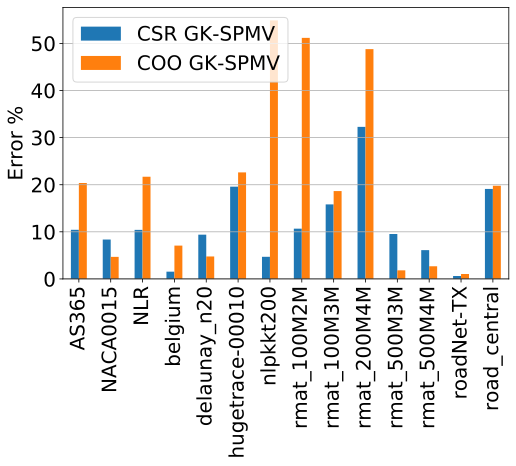

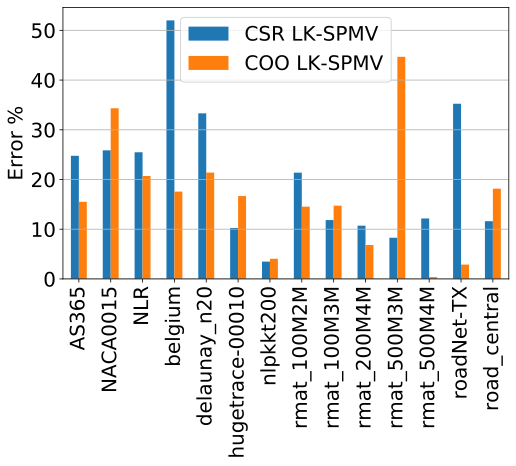

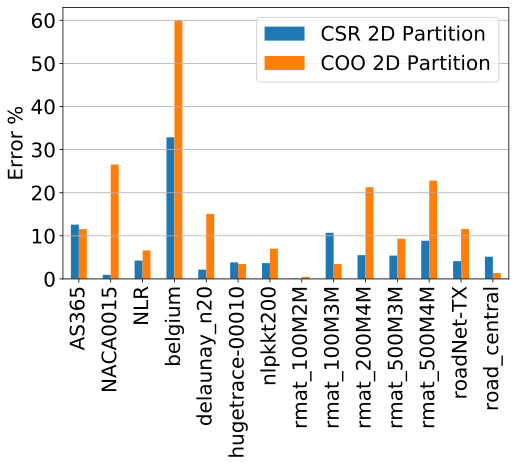

In [148]:


pdf = pdflib.PdfPages("paper/PDSEC21/figures/spmv_gk_ploynomial_cpu_225.pdf")
tmp = tot_pred[(tot_pred["Process"] == 225) & ((tot_pred["Model"] == "CSR GK-SPMV") | (tot_pred["Model"] == "COO GK-SPMV"))]
df = tmp.pivot(index='Name', columns='Model', values='Error')
ax = df.plot(kind="bar", y=['CSR GK-SPMV', 'COO GK-SPMV'], figsize = (8,5), fontsize=20)
ax.set_ylabel("Error %", fontsize=20)
ax.set_xlabel("")
ax.yaxis.grid(True)
ax.legend(fontsize=20)
pdf.savefig(bbox_inches = 'tight')
pdf.close() 

pdf = pdflib.PdfPages("paper/PDSEC21/figures/spmv_lk_ploynomial_cpu_225.pdf")
tmp = tot_pred[(tot_pred["Process"] == 225) & ((tot_pred["Model"] == "CSR LK-SPMV") | (tot_pred["Model"] == "COO LK-SPMV"))]
df = tmp.pivot(index='Name', columns='Model', values='Error')
ax = df.plot(kind="bar", y=['CSR LK-SPMV', 'COO LK-SPMV'], figsize = (8,5), fontsize=20)
ax.set_ylabel("Error %", fontsize=20)
ax.set_xlabel("")
ax.yaxis.grid(True)
ax.legend(fontsize=20)
pdf.savefig(bbox_inches = 'tight')
pdf.close() 

pdf = pdflib.PdfPages("paper/PDSEC21/figures/spmv_2d_ploynomial_cpu_225.pdf")
order = ["CSR 2D Partition", "COO 2D Partition"]
tmp = tot_pred[(tot_pred["Process"] == 225) & ((tot_pred["Model"] == "CSR 2D Partition") | (tot_pred["Model"] == "COO 2D Partition"))]
df = tmp.pivot(index='Name', columns='Model', values='Error')
ax = df.plot(kind="bar", y=['CSR 2D Partition', 'COO 2D Partition'], figsize = (8,5), fontsize=20)
ax.set_ylabel("Error %", fontsize=20)
ax.set_xlabel("")
ax.yaxis.grid(True)
ax.legend(fontsize=20)
pdf.savefig(bbox_inches = 'tight')
pdf.close() 



In [149]:
tot_pred.keys()

Index(['Name', 'Model', 'Nodes', 'Process', 'Matrix Size', 'Avg Row',
       'Nonzero per Row', 'Actual Time', 'Predicted Time', 'Error'],
      dtype='object')

In [153]:
tot_pred.groupby("Model").max()

,Name,Nodes,Process,Matrix Size,Avg Row,Nonzero per Row,Actual Time,Predicted Time,Error
Model,,,,,,,,,
COO 2D Partition,road_central,5.0,225,16240000.0,1082667.0,22.2932,34.197,36.591,59.97
COO GK-SPMV,road_central,5.0,225,16240000.0,72177.0,329.3290,859.100,604.140,54.88
COO LK-SPMV,road_central,5.0,225,16240000.0,72177.0,329.3290,156.920,215.750,44.67
CSR 2D Partition,road_central,5.0,225,16240000.0,1082667.0,22.2932,46.773,48.484,32.84
CSR GK-SPMV,road_central,5.0,225,16240000.0,72177.0,329.3290,102.770,96.478,32.28
CSR LK-SPMV,road_central,5.0,225,16240000.0,72177.0,329.3290,117.980,103.630,52.00


# Linear Model 

In [155]:
def train(random_2d_model, start, end, incr, _legends, _lines, models, df2, column, nZList):
    for row in range(start, end, incr):
        data = random_2d_model[(random_2d_model["PartitionRow"] == row) & (random_2d_model["NonZeroPerRow"]).isin(nZList)]
        if len(data) <3:
            continue
        data = data.sort_values(by=["NonZeroPerRow"])
        data = data.reset_index(drop=True)
        nnz_model1 = LinearRegression()
        X = data['NonZeroPerRow'][:, np.newaxis]
        Y = data[column][:, np.newaxis]
        nnz_model1.fit(X, Y)
        models[row] = nnz_model1
        y_pred = nnz_model1.predict(X)
        if row == 500000:
            print(start, " : ", data[column])
        df2["row-" + str(row)] = data[column]

        _legends.append("[row=" +str(row) + "]")
        _lines.append("row-" + str(row))

In [190]:
prcs = 256
nodes = 4

csr_2d_model = pd.read_csv("src/Results2/CSR_SpMV_2D_Model.csv")
csr_2d_model = csr_2d_model[(csr_2d_model["Nodes"] == nodes) & (csr_2d_model["nProcess"] == prcs)]
csr_2d_model = csr_2d_model.groupby(["MatrixSize", "NonZeroPerRow"]).mean()
csr_2d_model = csr_2d_model.sort_values(by=["MatrixSize", "NonZeroPerRow"])
csr_2d_model = csr_2d_model.reset_index()

csr_legends = []
csr_lines = []
indx = 0
csr_models = {}
# column = "AvgMatmulTime"
column = "AvgTime"
df_csr = pd.DataFrame()
nonZeroList = [1, 2, 4, 8, 16, 32, 64, 128]
nonZeroList2 = [1, 2, 4, 8, 16, 32, 64]
nonZeroList3 = [1, 2, 4, 8, 16, 32]
train(csr_2d_model, 1000, 10000, 1000, csr_legends, csr_lines, csr_models, df_csr, column, nonZeroList)
train(csr_2d_model, 10000, 100000, 2000, csr_legends, csr_lines, csr_models, df_csr, column, nonZeroList)
train(csr_2d_model, 100000, 200000, 5000, csr_legends, csr_lines, csr_models, df_csr, column, nonZeroList)
train(csr_2d_model, 200000, 300000, 10000, csr_legends, csr_lines, csr_models, df_csr, column, nonZeroList)
train(csr_2d_model, 300000, 500000, 10000, csr_legends, csr_lines, csr_models, df_csr, column, nonZeroList)
train(csr_2d_model, 500000, 1300000, 20000, csr_legends, csr_lines, csr_models, df_csr, column, nonZeroList2)
train(csr_2d_model, 130000, 2000000, 20000, csr_legends, csr_lines, csr_models, df_csr, column, nonZeroList2)
train(csr_2d_model, 2000000, 5000000, 20000, csr_legends, csr_lines, csr_models, df_csr, column, nonZeroList3)
train(csr_2d_model, 5000000, 8000000, 40000, csr_legends, csr_lines, csr_models, df_csr, column, nonZeroList3)
# train(random_2d_model, 1280000, 1300000, 20000, _legends, _lines, models, df2, column)


# df2[["NonZeroPerRow", "row-"+rows[1], "Predicted" + str(1)]]
# print(df2["row-1200000"]-df2["Predicted1"])


500000  :  0     836.7080
1     789.8495
2     827.8435
3     833.5925
4     830.2890
5    1081.1900
6    1172.6350
Name: AvgTime, dtype: float64


In [192]:
prcs = "100"
nodes = 5
# random_2d_model = pd.read_csv("src/Results/" + prcs + "_Skylake_CSR_SpMV_Model_of_Diagonal_BrCast_Reduce.csv")
random_2d_model = pd.read_csv("src/Results2/100_Skylake_CSR_SpMV_2D_Model.csv")
random_2d_model = random_2d_model[random_2d_model["Nodes"] == nodes]
random_2d_model = random_2d_model.groupby(["MatrixSize", "NonZeroPerRow"]).mean()
random_2d_model = random_2d_model.sort_values(by=["MatrixSize", "NonZeroPerRow"])
random_2d_model = random_2d_model.reset_index()

_legends = []
_lines = []
indx = 0
models = {}
column = "AvgMatmulTime"
# column = "AvgTime"
df2 = pd.DataFrame()
nonZeroList = [1, 2, 4, 8, 16, 32, 64, 128]
nonZeroList2 = [1, 2, 4, 8, 16, 32, 64]
nonZeroList3 = [1, 2, 4, 8, 16, 32]
train(random_2d_model, 1000, 10000, 1000, _legends, _lines, models, df2, column, nonZeroList)
train(random_2d_model, 10000, 100000, 2000, _legends, _lines, models, df2, column, nonZeroList)
train(random_2d_model, 100000, 200000, 5000, _legends, _lines, models, df2, column, nonZeroList)
train(random_2d_model, 200000, 300000, 10000, _legends, _lines, models, df2, column, nonZeroList)
train(random_2d_model, 300000, 500000, 10000, _legends, _lines, models, df2, column, nonZeroList)
train(random_2d_model, 500000, 1300000, 20000, _legends, _lines, models, df2, column, nonZeroList2)
train(random_2d_model, 130000, 2000000, 20000, _legends, _lines, models, df2, column, nonZeroList2)
train(random_2d_model, 2000000, 5000000, 20000, _legends, _lines, models, df2, column, nonZeroList3)
train(random_2d_model, 5000000, 8000000, 40000, _legends, _lines, models, df2, column, nonZeroList3)
# train(random_2d_model, 1280000, 1300000, 20000, _legends, _lines, models, df2, column)


# df2[["NonZeroPerRow", "row-"+rows[1], "Predicted" + str(1)]]
# print(df2["row-1200000"]-df2["Predicted1"])

500000  :  0      90.8776
1     137.4135
2     266.5280
3     487.7735
4     961.9920
5    1893.6550
6    3762.4600
Name: AvgMatmulTime, dtype: float64


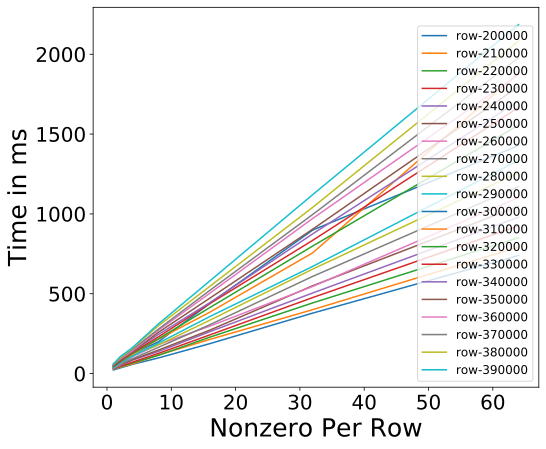

In [208]:
df2["NonZeroPerRow"] = nonZeroList
plotData = df2
printRow = []
for start in range(200000,400000,10000):
# for start in range(10000,44000,2000):
    printRow.append("row-" + str(start))
plotData = plotData[0:len(nonZeroList2)]
pdf = pdflib.PdfPages("paper/PDSEC21/figures/model_nonzero_perRow_for_particular_row_process_100_2.pdf")
ax = plotData.plot(kind="line", y=printRow, x="NonZeroPerRow", figsize=(8,7), fontsize=20)
# ax.legend(_legends, fontsize=12)
ax.set_ylabel("Time in ms", fontsize=25)
ax.set_xlabel("Nonzero Per Row", fontsize=25)
ax.legend(fontsize=12)
pdf.savefig(bbox_inches = 'tight')
pdf.close() 

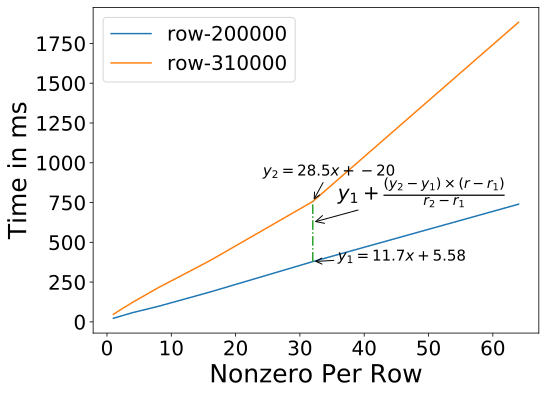

In [207]:
pdf = pdflib.PdfPages("paper/PDSEC21/figures/prediction_equation.pdf")
fig = plt.figure()
ax = plt.gca()
plotData.plot(kind="line", ax = ax, y=["row-200000", "row-310000"], x="NonZeroPerRow", figsize=(8,6), fontsize=20)
# ax.legend(_legends, fontsize=12)
ax.legend(fontsize=20)
ax.set_ylabel("Time in ms", fontsize=25)
ax.set_xlabel("Nonzero Per Row", fontsize=25)

point1 = [32, plotData["row-200000"][5]]
point2 = [32, plotData["row-310000"][5]]

x_values = [point1[0], point2[0]]
y_values = [point1[1], point2[1]]

plt.plot(x_values, y_values, linestyle='-.')

ax.annotate(r'$y_1 = ' + str('{0:.3g}'.format(models[200000].coef_[0][0])) + " x + " + str('{0:.3g}'.format(models[200000].intercept_[0])) +'$', xy=(x_values[0], y_values[0]), 
            xytext=(25, 5), textcoords='offset points', va='center',
            arrowprops=dict(arrowstyle='->'), fontsize=15)
ax.annotate(r'$y_2 = ' + str('{0:.3g}'.format(models[310000].coef_[0][0])) + " x + " + str('{0:.3g}'.format(models[310000].intercept_[0])) +'$', xy=(x_values[1], y_values[1]), 
            xytext=(-50, 30), textcoords='offset points', va='center',
            arrowprops=dict(arrowstyle='->'), fontsize=15)
y1 = models[200000].coef_[0][0]*32 + models[200000].intercept_[0]
y2 = models[310000].coef_[0][0]*32 + models[200000].intercept_[0]
row = 250000.0
z = 250000
predict = y1 + ((y2-y1)*(z - 200000))/(310000-200000)
predict_point = [32, predict]
ax.annotate(r'$y_1 + \frac{(y_2 - y_1)\times (r-r_1)}{r_2-r_1}' +'$', xy=(predict_point[0], predict_point[1]), 
            xytext=(25, 30), textcoords='offset points', va='center',
            arrowprops=dict(arrowstyle='->'), fontsize=20)
# ax.set_aspect('equal')
pdf.savefig(bbox_inches = 'tight')
pdf.close() 

In [170]:
csr_full_data = pd.read_csv("src/Results2/MPI_CSR_2D_SpMV.csv")
csr_full_data = csr_full_data[(csr_full_data["Nodes"] == 4) & (csr_full_data["nProcess"] == 256)]
csr_real_data = csr_full_data[csr_full_data["Name"].isin(test_matrices)].groupby("Name").mean().reset_index()
csr_real_data

,Name,MatrixSize,AvgRow,NNZ,NonZeroPerRow,AvgNPRSD,AvgTime,AvgBcastTime,AvgMatmulTime,AvgReduceTime,TotalRun,Nodes,nProcess,DataType
0,AS365,3799275,237455,88813,0.374021,0.594650,309.624,63.7416,2.376630,243.506,20,4,256,4
1,NACA0015,1039183,64949,24334,0.374671,0.595025,181.754,38.2020,0.559846,142.992,20,4,256,4
2,NLR,4163763,260236,97562,0.374899,0.595145,355.200,65.4970,2.724590,286.979,20,4,256,4
3,belgium,1441295,90081,12109,0.134425,0.356386,242.936,44.0731,0.325963,198.537,20,4,256,4
4,delaunay_n20,1048576,65536,24575,0.374995,0.598429,226.721,45.4691,0.566955,180.685,20,4,256,4
5,hugetrace-00010,12057441,753591,141267,0.187458,0.419228,1080.780,232.1020,7.319480,841.359,20,4,256,4
6,nlpkkt200,16240000,1015000,1687443,1.662510,1.257520,1153.720,234.5940,41.355100,877.776,20,4,256,4
7,roadNet-TX,1393383,87087,15012,0.172390,0.407197,241.677,42.9893,0.447799,198.240,20,4,256,4
8,road_central,14081816,880114,132292,0.150313,0.379840,1031.870,258.3600,7.262390,766.252,20,4,256,4


In [171]:
key_max = max(csr_models.keys())
key_min = min(csr_models.keys())
key_max
csr_linear_pred = pd.DataFrame()
mat = []
model_name = []
err = []
# column = "AvgMatmulTime"
column = "AvgTime"
for index,row in csr_real_data.iterrows():
    npr = row["NonZeroPerRow"]
    if row["AvgRow"] in csr_models:
        print("found")
    else:
        key = int(row["AvgRow"]/1000)*1000
        lowKey = key
        highKey = key + 1000
        while lowKey not in csr_models:
            if lowKey <= key_min:
                break
            lowKey = lowKey - 1000
        while highKey not in csr_models:
            if highKey >= key_max:
                break
            highKey = highKey + 1000
        
        if highKey in csr_models and lowKey in csr_models:
            m1 = csr_models[lowKey]
            y1 = m1.predict(np.array(row["NonZeroPerRow"])[newaxis, newaxis])
            m2 = csr_models[highKey]
            y2 = m2.predict(np.array(row["NonZeroPerRow"])[newaxis, newaxis])
            if y1<y2:
                predict = y1 + ((y2-y1)*(row["AvgRow"] - lowKey))/(highKey-lowKey)
            else:
                predict = y2 + ((y1-y2)*(row["AvgRow"] - lowKey))/(highKey-lowKey)
            error = abs(predict - row[column])*100/row[column]
            name = row["Name"].split('_')
            print(row["Name"], row["nProcess"], " ", row["AvgRow"], " ", row["NonZeroPerRow"], " Predict: ", '{0:.4g}'.format(predict[0][0]), " Actual: ", row[column], " Error: ", '{0:.4g}'.format(error[0][0]), "/%")
            mat.append(row["Name"])
            model_name.append("CSR 2D Partition")
            err.append(error[0][0])
        else:
            print(y1, "< Avg Time")
        print("lowKey", lowKey, " highKey: ", highKey)

csr_linear_pred["Name"] = mat
csr_linear_pred["Model"] = model_name
csr_linear_pred["Error"] = err

AS365 256   237455   0.374021  Predict:  350.5  Actual:  309.624  Error:  13.2 /%
lowKey 230000  highKey:  240000
NACA0015 256   64949   0.374671  Predict:  207.1  Actual:  181.75400000000002  Error:  13.93 /%
lowKey 64000  highKey:  66000
NLR 256   260236   0.374899  Predict:  352.9  Actual:  355.2  Error:  0.6581 /%
lowKey 260000  highKey:  270000
belgium 256   90081   0.134425  Predict:  235.8  Actual:  242.93599999999998  Error:  2.946 /%
lowKey 90000  highKey:  92000
delaunay_n20 256   65536   0.37499499999999997  Predict:  223.4  Actual:  226.72099999999998  Error:  1.45 /%
lowKey 64000  highKey:  66000
hugetrace-00010 256   753591   0.18745799999999999  Predict:  915.6  Actual:  1080.78  Error:  15.28 /%
lowKey 740000  highKey:  760000
nlpkkt200 256   1015000   1.66251  Predict:  1111  Actual:  1153.72  Error:  3.71 /%
lowKey 1000000  highKey:  1020000
roadNet-TX 256   87087   0.17239000000000002  Predict:  244.1  Actual:  241.67700000000002  Error:  0.9856 /%
lowKey 86000  high

In [173]:
prcs = 256
nodes = 4

coo_2d_model = pd.read_csv("src/Results2/COO_SpMV_2D_Model.csv")
coo_2d_model = coo_2d_model[(coo_2d_model["Nodes"] == nodes) & (coo_2d_model["nProcess"] == prcs)]
coo_2d_model = coo_2d_model.groupby(["MatrixSize", "NonZeroPerRow"]).mean()
coo_2d_model = coo_2d_model.sort_values(by=["MatrixSize", "NonZeroPerRow"])
coo_2d_model = coo_2d_model.reset_index()

coo_legends = []
coo_lines = []
indx = 0
coo_models = {}
column = "AvgTime"
df_coo = pd.DataFrame()
nonZeroList = [1, 2, 4, 8, 16, 32, 64, 128]
nonZeroList2 = [1, 2, 4, 8, 16, 32, 64]
nonZeroList3 = [1, 2, 4, 8, 16, 32]
train(coo_2d_model, 1000, 10000, 1000, coo_legends, coo_lines, coo_models, df_coo, column, nonZeroList)
train(coo_2d_model, 10000, 100000, 2000, coo_legends, coo_lines, coo_models, df_coo, column, nonZeroList)
train(coo_2d_model, 100000, 200000, 5000, coo_legends, coo_lines, coo_models, df_coo, column, nonZeroList)
train(coo_2d_model, 200000, 300000, 10000, coo_legends, coo_lines, coo_models, df_coo, column, nonZeroList)
train(coo_2d_model, 300000, 500000, 10000, coo_legends, coo_lines, coo_models, df_coo, column, nonZeroList)
train(coo_2d_model, 500000, 1300000, 20000, coo_legends, coo_lines, coo_models, df_coo, column, nonZeroList2)
train(coo_2d_model, 130000, 2000000, 20000, coo_legends, coo_lines, coo_models, df_coo, column, nonZeroList2)
train(coo_2d_model, 2000000, 5000000, 20000, coo_legends, coo_lines, coo_models, df_coo, column, nonZeroList3)
train(coo_2d_model, 5000000, 8000000, 40000, coo_legends, coo_lines, coo_models, df_coo, column, nonZeroList3)


500000  :  0     806.5685
1     775.3990
2     777.9230
3     797.2720
4     894.3155
5    1080.3900
6    1314.2150
Name: AvgTime, dtype: float64


In [174]:
coo_full_data = pd.read_csv("src/Results2/MPI_COO_2D_SpMV.csv")
coo_full_data = coo_full_data[(coo_full_data["Nodes"] == 4) & (coo_full_data["nProcess"] == 256)]
coo_real_data = coo_full_data[coo_full_data["Name"].isin(test_matrices)].groupby("Name").mean().reset_index()
coo_real_data

,Name,MatrixSize,AvgRow,NNZ,NonZeroPerRow,AvgNPRSD,AvgTime,AvgBcastTime,AvgMatmulTime,AvgReduceTime,TotalRun,Nodes,nProcess,DataType
0,AS365,3799275,237455,88813,0.374021,0.594650,385.069,65.8414,0.878476,318.349,20,4,256,4
1,NACA0015,1039183,64949,24334,0.374671,0.595025,190.806,33.5307,0.070908,157.204,20,4,256,4
2,NLR,4163763,260236,97562,0.374899,0.595145,337.780,63.0872,1.073200,273.620,20,4,256,4
3,belgium,1441295,90081,12109,0.134425,0.356386,235.742,41.9165,0.067582,193.758,20,4,256,4
4,delaunay_n20,1048576,65536,24575,0.374995,0.598429,233.858,43.5393,0.069777,190.249,20,4,256,4
5,hugetrace-00010,12057441,753591,141267,0.187458,0.419228,961.403,253.9040,2.293340,705.205,20,4,256,4
6,nlpkkt200,16240000,1015000,1687443,1.662510,1.257520,1208.840,245.8860,20.148300,942.801,20,4,256,4
7,roadNet-TX,1393383,87087,15012,0.172390,0.407197,223.207,40.7341,0.074659,182.398,20,4,256,4
8,road_central,14081816,880114,132292,0.150313,0.379840,1230.870,252.4620,2.305890,976.104,20,4,256,4


In [ ]:

coo_2d = pd.read_csv("src/Results/MPI_COO_2D_SpMV.csv")
rmat_coo_2d = coo_2d[coo_2d['Name'].str.contains("rmat")].reset_index(drop=True)
rmat_coo_2d = rmat_coo_2d.groupby(["Name", "nProcess"]).mean().reset_index().sort_values(by="Name").reset_index(drop=True)


In [175]:
key_max = max(coo_models.keys())
key_min = min(coo_models.keys())
key_max
coo_linear_pred = pd.DataFrame()
mat = []
model_name = []
err = []
column = "AvgTime"
for index,row in coo_real_data.iterrows():
    npr = row["NonZeroPerRow"]
    if row["AvgRow"] in coo_models:
        print("found")
    else:
        key = int(row["AvgRow"]/1000)*1000
        lowKey = key
        highKey = key + 1000
        while lowKey not in coo_models:
            if lowKey <= key_min:
                break
            lowKey = lowKey - 1000
        while highKey not in coo_models:
            if highKey >= key_max:
                break
            highKey = highKey + 1000
        
        if highKey in coo_models and lowKey in coo_models:
            m1 = coo_models[lowKey]
            y1 = m1.predict(np.array(row["NonZeroPerRow"])[newaxis, newaxis])
            m2 = coo_models[highKey]
            y2 = m2.predict(np.array(row["NonZeroPerRow"])[newaxis, newaxis])
            if y1<y2:
                predict = y1 + ((y2-y1)*(row["AvgRow"] - lowKey))/(highKey-lowKey)
            else:
                predict = y2 + ((y1-y2)*(row["AvgRow"] - lowKey))/(highKey-lowKey)
            error = abs(predict - row[column])*100/row[column]
            name = row["Name"].split('_')
            print(row["Name"], row["nProcess"], " ", row["AvgRow"], " ", row["NonZeroPerRow"], " Predict: ", '{0:.4g}'.format(predict[0][0]), " Actual: ", row[column], " Error: ", '{0:.4g}'.format(error[0][0]), "/%")
            mat.append(row["Name"])
            model_name.append("COO 2D Partition")
            err.append(error[0][0])
        else:
            print(y1, "< Avg Time")
        print("lowKey", lowKey, " highKey: ", highKey)

coo_linear_pred["Name"] = mat
coo_linear_pred["Model"] = model_name
coo_linear_pred["Error"] = err

AS365 256   237455   0.374021  Predict:  356.2  Actual:  385.069  Error:  7.501 /%
lowKey 230000  highKey:  240000
NACA0015 256   64949   0.374671  Predict:  199.2  Actual:  190.80599999999998  Error:  4.418 /%
lowKey 64000  highKey:  66000
NLR 256   260236   0.374899  Predict:  331.2  Actual:  337.78  Error:  1.957 /%
lowKey 260000  highKey:  270000
belgium 256   90081   0.134425  Predict:  232.4  Actual:  235.74200000000002  Error:  1.406 /%
lowKey 90000  highKey:  92000
delaunay_n20 256   65536   0.37499499999999997  Predict:  215.6  Actual:  233.858  Error:  7.817 /%
lowKey 64000  highKey:  66000
hugetrace-00010 256   753591   0.18745799999999999  Predict:  955.5  Actual:  961.403  Error:  0.6155 /%
lowKey 740000  highKey:  760000
nlpkkt200 256   1015000   1.66251  Predict:  1123  Actual:  1208.84  Error:  7.075 /%
lowKey 1000000  highKey:  1020000
roadNet-TX 256   87087   0.17239000000000002  Predict:  233.4  Actual:  223.207  Error:  4.572 /%
lowKey 86000  highKey:  88000
road_ce

In [176]:
print("CSR Max Error: ", max(csr_linear_pred["Error"]))
print("CSR Average Error: ", sum(csr_linear_pred["Error"])/len(csr_linear_pred["Error"]))

print("COO Max Error: ", max(coo_linear_pred["Error"]))
print("COO Average Error: ", sum(coo_linear_pred["Error"])/len(coo_linear_pred["Error"]))

CSR Max Error:  15.2806697900873
CSR Average Error:  5.951905748542241
COO Max Error:  22.675842186585616
COO Average Error:  6.448677657937321


In [177]:
linear_pred = pd.concat([csr_linear_pred, coo_linear_pred])
linear_pred = linear_pred.reset_index(drop=True)
linear_pred

,Name,Model,Error
0,AS365,CSR 2D Partition,13.202407
1,NACA0015,CSR 2D Partition,13.926008
2,NLR,CSR 2D Partition,0.658133
3,belgium,CSR 2D Partition,2.946240
4,delaunay_n20,CSR 2D Partition,1.450369
5,hugetrace-00010,CSR 2D Partition,15.280670
6,nlpkkt200,CSR 2D Partition,3.709982
7,roadNet-TX,CSR 2D Partition,0.985641
8,road_central,CSR 2D Partition,1.407703
9,AS365,COO 2D Partition,7.501303


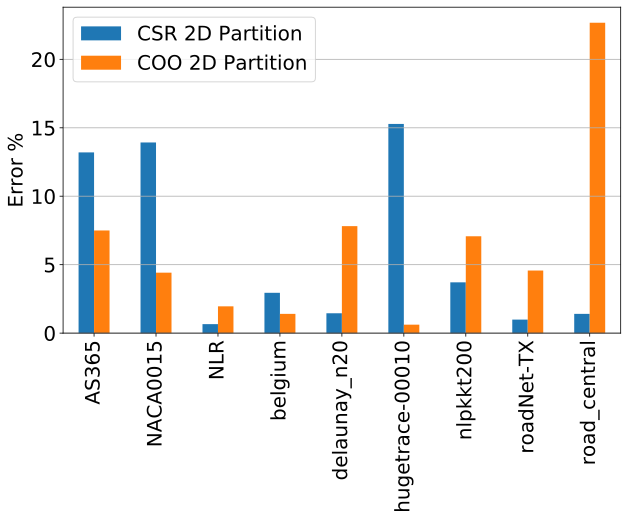

In [178]:
pdf = pdflib.PdfPages("paper/PDSEC21/figures/spmv_2d_linear_cpu_225.pdf")
order = ["CSR 2D Partition", "COO 2D Partition"]
tmp = linear_pred[((linear_pred["Model"] == "CSR 2D Partition") | (linear_pred["Model"] == "COO 2D Partition"))]
df = tmp.pivot(index='Name', columns='Model', values='Error')
ax = df.plot(kind="bar", y=['CSR 2D Partition', 'COO 2D Partition'], figsize = (10,6), fontsize=20)
ax.set_ylabel("Error %", fontsize=20)
ax.set_xlabel("")
ax.yaxis.grid(True)
ax.legend(fontsize=20)
pdf.savefig(bbox_inches = 'tight')
pdf.close()

In [218]:
prcs = 225
nodes = 5

csr_2d_model = pd.read_csv("src/Results/CSR_SpMV_2D_Model.csv")
csr_2d_model = csr_2d_model[(csr_2d_model["Nodes"] == nodes) & (csr_2d_model["nProcess"] == prcs)]
csr_2d_model = csr_2d_model.groupby(["MatrixSize", "NonZeroPerRow"]).mean()
csr_2d_model = csr_2d_model.sort_values(by=["MatrixSize", "NonZeroPerRow"])
csr_2d_model = csr_2d_model.reset_index()

csr_legends = []
csr_lines = []
indx = 0
rmat_csr_models = {}
# column = "AvgMatmulTime"
column = "AvgTime"
df_csr = pd.DataFrame()
nonZeroList = [1, 2, 4, 8, 16, 32, 64, 128]
nonZeroList2 = [1, 2, 4, 8, 16, 32, 64]
nonZeroList3 = [1, 2, 4, 8, 16, 32]
# train(csr_2d_model, 1000, 10000, 1000, csr_legends, csr_lines, csr_models, df_csr, column, nonZeroList)
train(csr_2d_model, 100000, 300000, 1000, csr_legends, csr_lines, rmat_csr_models, df_csr, column, nonZeroList)
# train(csr_2d_model, 100000, 200000, 5000, csr_legends, csr_lines, csr_models, df_csr, column, nonZeroList)
# train(csr_2d_model, 200000, 300000, 10000, csr_legends, csr_lines, csr_models, df_csr, column, nonZeroList)
# train(csr_2d_model, 300000, 500000, 10000, csr_legends, csr_lines, csr_models, df_csr, column, nonZeroList)
# train(csr_2d_model, 500000, 1300000, 20000, csr_legends, csr_lines, csr_models, df_csr, column, nonZeroList2)
# train(csr_2d_model, 130000, 2000000, 20000, csr_legends, csr_lines, csr_models, df_csr, column, nonZeroList2)
# train(csr_2d_model, 2000000, 5000000, 20000, csr_legends, csr_lines, csr_models, df_csr, column, nonZeroList3)
# train(csr_2d_model, 5000000, 8000000, 40000, csr_legends, csr_lines, csr_models, df_csr, column, nonZeroList3)
# train(random_2d_model, 1280000, 1300000, 20000, _legends, _lines, models, df2, column)


# df2[["NonZeroPerRow", "row-"+rows[1], "Predicted" + str(1)]]
# print(df2["row-1200000"]-df2["Predicted1"])


In [213]:
rmat_csr_real_data = rmat_csr_2d[rmat_csr_2d["Name"].isin(rmat_test_matrices)].groupby("Name").mean().reset_index()
rmat_csr_real_data

,Name,nProcess,MatrixSize,AvgRow,NNZ,NonZeroPerRow,AvgNPRSD,AvgTime,AvgBcastTime,AvgMatmulTime,AvgReduceTime,TotalRun,Nodes,DataType
0,rmat_100M2M,225,1970845,131390,888888,6.76527,17.7555,7.17407,0.531500,5.84422,0.798352,20,5,4
1,rmat_100M3M,225,2896462,193098,888888,4.60330,12.7263,8.54150,0.791603,6.68202,1.067880,20,5,4
2,rmat_200M4M,225,3923788,261586,1777777,6.79615,19.1541,15.85990,1.086910,13.19260,1.580370,20,5,4
3,rmat_500M3M,225,2990440,199363,4444444,22.29320,61.3713,26.07220,0.817440,22.40910,2.845630,20,5,4
4,rmat_500M4M,225,3981780,265452,4444444,16.74290,47.0510,29.79630,1.103290,25.80380,2.889260,20,5,4


In [219]:
key_max = max(rmat_csr_models.keys())
key_min = min(rmat_csr_models.keys())
key_max
rmat_csr_linear_pred = pd.DataFrame()
mat = []
model_name = []
err = []
# column = "AvgMatmulTime"
column = "AvgTime"
for index,row in rmat_csr_real_data.iterrows():
    npr = row["NonZeroPerRow"]
    if row["AvgRow"] in rmat_csr_models:
        print("found")
    else:
        key = int(row["AvgRow"]/1000)*1000
        print(key)
        lowKey = key
        highKey = key + 1000
        while lowKey not in rmat_csr_models:
            if lowKey <= key_min:
                break
            lowKey = lowKey - 1000
        while highKey not in rmat_csr_models:
            if highKey >= key_max:
                break
            highKey = highKey + 1000
        
        if highKey in rmat_csr_models and lowKey in rmat_csr_models:
            m1 = rmat_csr_models[lowKey]
            y1 = m1.predict(np.array(row["NonZeroPerRow"])[newaxis, newaxis])
            m2 = rmat_csr_models[highKey]
            y2 = m2.predict(np.array(row["NonZeroPerRow"])[newaxis, newaxis])
            if y1<y2:
                predict = y1 + ((y2-y1)*(row["AvgRow"] - lowKey))/(highKey-lowKey)
            else:
                predict = y2 + ((y1-y2)*(row["AvgRow"] - lowKey))/(highKey-lowKey)
            error = abs(predict - row[column])*100/row[column]
            name = row["Name"].split('_')
            print(row["Name"], row["nProcess"], " ", row["AvgRow"], " ", row["NonZeroPerRow"], " Predict: ", '{0:.4g}'.format(predict[0][0]), " Actual: ", row[column], " Error: ", '{0:.4g}'.format(error[0][0]), "/%")
            mat.append(row["Name"])
            model_name.append("CSR 2D Partition")
            err.append(error[0][0])
        else:
            print(y1, "< Avg Time")
        print("lowKey", lowKey, " highKey: ", highKey)

rmat_csr_linear_pred["Name"] = mat
rmat_csr_linear_pred["Model"] = model_name
rmat_csr_linear_pred["Error"] = err

131000
rmat_100M2M 225   131390   6.76527  Predict:  3.327  Actual:  7.1740699999999995  Error:  53.63 /%
lowKey 130000  highKey:  132000
193000
rmat_100M3M 225   193098   4.6033  Predict:  4.317  Actual:  8.5415  Error:  49.46 /%
lowKey 192000  highKey:  194000
261000
rmat_200M4M 225   261586   6.79615  Predict:  8.395  Actual:  15.8599  Error:  47.07 /%
lowKey 260000  highKey:  262000
199000
rmat_500M3M 225   199363   22.2932  Predict:  13.59  Actual:  26.0722  Error:  47.86 /%
lowKey 198000  highKey:  200000
265000
rmat_500M4M 225   265452   16.7429  Predict:  16.22  Actual:  29.7963  Error:  45.55 /%
lowKey 264000  highKey:  266000


In [220]:
rmat_csr_real_data

,Name,nProcess,MatrixSize,AvgRow,NNZ,NonZeroPerRow,AvgNPRSD,AvgTime,AvgBcastTime,AvgMatmulTime,AvgReduceTime,TotalRun,Nodes,DataType
0,rmat_100M2M,225,1970845,131390,888888,6.76527,17.7555,7.17407,0.531500,5.84422,0.798352,20,5,4
1,rmat_100M3M,225,2896462,193098,888888,4.60330,12.7263,8.54150,0.791603,6.68202,1.067880,20,5,4
2,rmat_200M4M,225,3923788,261586,1777777,6.79615,19.1541,15.85990,1.086910,13.19260,1.580370,20,5,4
3,rmat_500M3M,225,2990440,199363,4444444,22.29320,61.3713,26.07220,0.817440,22.40910,2.845630,20,5,4
4,rmat_500M4M,225,3981780,265452,4444444,16.74290,47.0510,29.79630,1.103290,25.80380,2.889260,20,5,4


In [255]:
csr_omp_data = pd.read_csv("src/Results/Cascade_Lake_CSR_OMP_SpMV.csv")
csr_omp_data = csr_omp_data[csr_omp_data["Name"].isin(test_matrices)].groupby("Name").mean().reset_index()
csr_omp_data = csr_omp_data.groupby(["Name", "Threads"]).mean().reset_index()
csr_omp_data

,Name,Threads,M,N,NNZ,NonZeroPerRow,AvgTime,MultiTime,ScatterTime,TotalRun,DataType,SDD
0,AS365,48,3799275,3799275,22736152,5.98434,9.44505,8.287330,1.157720,20,4,0.869021
1,NACA0015,48,1039183,1039183,6229636,5.99474,2.25990,1.848480,0.411421,20,4,0.857102
2,NLR,48,4163763,4163763,24975952,5.99841,19.98680,14.274200,5.712590,20,4,0.841942
3,belgium,48,1441295,1441295,3099940,2.15080,1.13313,0.783225,0.349909,20,4,0.493177
4,delaunay_n20,48,1048576,1048576,6291372,5.99992,3.91462,2.427700,1.486920,20,4,1.336640
5,hugetrace-00010,48,12057441,12057441,36164358,2.99934,24.57650,20.017900,4.558600,20,4,0.025684
6,nlpkkt200,48,16240000,16240000,448225632,27.60010,83.19850,78.598300,4.600220,20,4,2.387010
7,roadNet-TX,48,1393383,1393383,3843320,2.75827,4.80665,2.875110,1.931540,20,4,1.032860
8,road_central,48,14081816,14081816,33866826,2.40500,26.64580,22.294100,4.351760,20,4,0.905406


In [263]:
# local_csr_kway = pd.read_csv("src/Results/MPI_Local_KWAY_CSR_SpMV.csv")
# local_csr_kway = local_csr_kway[~local_csr_kway['Name'].str.contains("rmat")].reset_index(drop=True)
# local_csr_kway = local_csr_kway.groupby(["Name", "nProcess"]).mean().reset_index().sort_values(by="Name").reset_index(drop=True)
tmp_local_csr_kway = pd.read_csv("src/Results/MPI_Local_KWAY_CSR_SpMV.csv")
test_local_csr_kway = tmp_local_csr_kway[tmp_local_csr_kway["Name"].isin(test_matrices)].groupby("Name").mean().reset_index()
test_local_csr_kway = test_local_csr_kway.groupby(["Name"]).mean().reset_index()
g_ = ""
omp_t = ""
mpi_t = ""
compare = ""
for i,r in test_local_csr_kway.iterrows():
    g_ += " & " + r["Name"]
    omp_t += " & " + str(round(csr_omp_data[csr_omp_data["Name"] == r["Name"]]["AvgTime"].iloc[0], 2))
    mpi_t += " & " + str(round(r["AvgTime"], 2))
    compare += " & " + str(round(csr_omp_data[csr_omp_data["Name"] == r["Name"]]["AvgTime"].iloc[0]/r["AvgTime"], 2))
#     print(r["Name"], " ", r["AvgTime"], csr_omp_data[csr_omp_data["Name"] == r["Name"]]["AvgTime"].iloc[0])
print(g_ + " \\\\ \hline")
print(mpi_t + " \\\\ \hline")
print(omp_t + " \\\\ \hline")
print(compare + " \\\\ \hline")

 & AS365 & NACA0015 & NLR & belgium & delaunay_n20 & hugetrace-00010 & nlpkkt200 & roadNet-TX & road_central \\ \hline
 & 1.01 & 0.34 & 1.15 & 0.41 & 0.34 & 2.18 & 7.23 & 0.42 & 2.3 \\ \hline
 & 9.45 & 2.26 & 19.99 & 1.13 & 3.91 & 24.58 & 83.2 & 4.81 & 26.65 \\ \hline
 & 9.38 & 6.61 & 17.39 & 2.76 & 11.47 & 11.27 & 11.51 & 11.54 & 11.59 \\ \hline


In [254]:

# test_local_csr_kway = tmp_local_csr_kway[tmp_local_csr_kway["Name"].isin(test_matrices)].reset_index()
tmp_local_csr_kway.iloc[181:,][["Name", "AvgTime"]]

,Name,AvgTime
181,delaunay_n20,0.334761
182,NACA0015,0.358213
183,belgium,0.423714
184,AS365,1.017650
185,roadNet-TX,0.414445
186,NLR,1.190500
187,hugetrace-00010,2.196840
188,nlpkkt200,7.265180
189,road_central,2.375320
